<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_13_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [9]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [11]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [12]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [26]:
total_alpha_content = [ i / 1000 for i in range( 10 ) ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

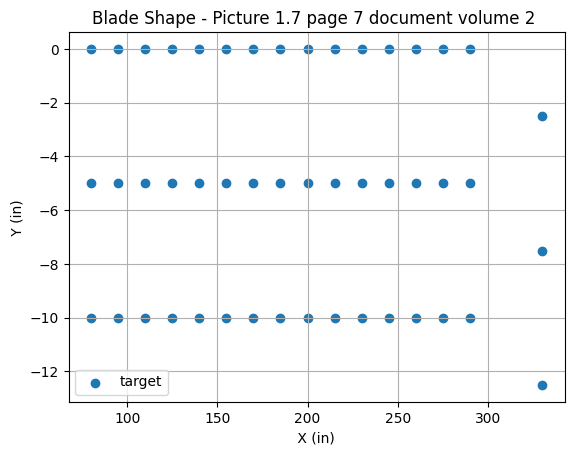

In [27]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [28]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.0 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9945588015689903
r2_score in Simulation Failt  void  for Each Blade :  0.9791094751323238
Error in Simulation Fault for Each Blade :  -0.7845830067932935  --- r2_score Fault S ----  0.9862812550255899
Error in Simulation Fault T  for Each Blade :  -0.7845830067932935  --- r2_score Fault T :  -1.5529909089550613
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9846881161901136
r2_score in Simulation Failt  void  for Each Blade :  0.9923932357981008
Error in Simulation Fault for Each Blade :  -0.46636555245974054  --- r2_score Fault S ----  0.9825017615019462
Error in Simulation Fault T  for Each Blade :  -0.46636555245974054  --- r2_score Fault T :  -0.4308188970643536
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9803741164273486
r2_score in Simulation Failt  void  for Each Blade :  0.977418799298436
Error in Simulation F

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.2463 - loss: 1.4116 - val_acc: 0.2500 - val_loss: 1.3630
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2630 - loss: 1.3763 - val_acc: 0.2750 - val_loss: 1.3376
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3285 - loss: 1.3187 - val_acc: 0.3000 - val_loss: 1.3170
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3142 - loss: 1.2935 - val_acc: 0.3125 - val_loss: 1.3000
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3898 - loss: 1.2615 - val_acc: 0.3250 - val_loss: 1.2836
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3984 - loss: 1.2314 - val_acc: 0.3375 - val_loss: 1.2637
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4590 - loss: 1.2009 - val_acc: 0.3500 - val_loss: 1.2487
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4643 - loss: 1.1951 - val_acc: 0.3500 - val_loss: 1.2316
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4775 - loss: 1.1932 - 

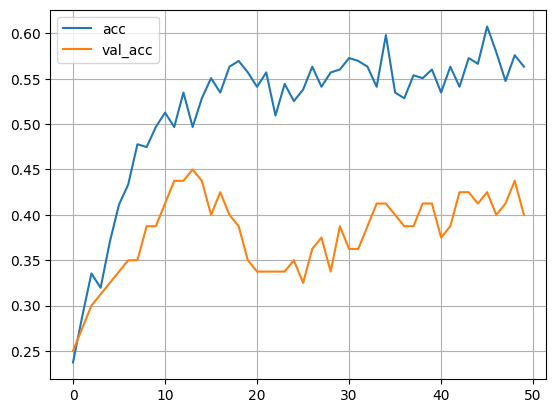

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4305 - loss: 0.9637 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9889697350960264
r2_score in Simulation Failt  void  for Each Blade :  0.9752835650928309
Error in Simulation Fault for Each Blade :  -0.924789136947541  --- r2_score Fault S ----  0.9853048924022954
Error in Simulation Fault T  for Each Blade :  -0.924789136947541  --- r2_score Fault T :  -1.33183026538519
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9752475571143113
r2_score in Simulation Failt  void  for Each Blade :  0.9568579928101146
Error in Simulation Fault for Each Blade :  1.1379003016840512  --- r2_score Fault S ----  0.9655184954843142
Error in Simulation Fault T  for Each Blade :  1.1379003016840512  --- r2_score Fault T :  -1.311064672203683
 ----- for each Blade Simulated ----- 
r2_score 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.1735 - loss: 1.4364 - val_acc: 0.2000 - val_loss: 1.4619
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2202 - loss: 1.4308 - val_acc: 0.2500 - val_loss: 1.4406
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2617 - loss: 1.3787 - val_acc: 0.3125 - val_loss: 1.4267
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2622 - loss: 1.3987 - val_acc: 0.3000 - val_loss: 1.4142
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2901 - loss: 1.3541 - val_acc: 0.3125 - val_loss: 1.4045
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2627 - loss: 1.3626 - val_acc: 0.3000 - val_loss: 1.3959
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2568 - loss: 1.3725 - val_acc: 0.3000 - val_loss: 1.3870
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2944 - loss: 1.3506 - val_acc: 0.3500 - val_loss: 1.3786
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3800 - loss: 1.3265 - 

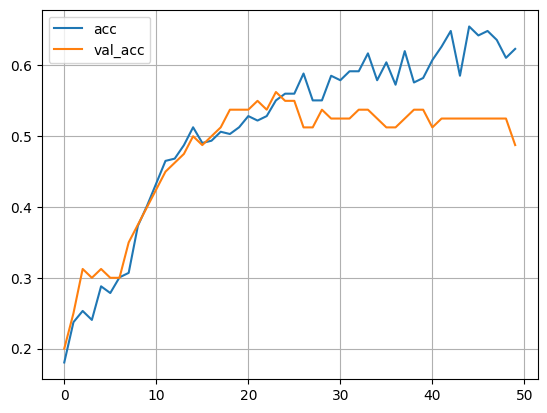

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5250 - loss: 0.7854 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9910424853270938
r2_score in Simulation Failt  void  for Each Blade :  0.992315787912414
Error in Simulation Fault for Each Blade :  0.31545369029710013  --- r2_score Fault S ----  0.9657062693097157
Error in Simulation Fault T  for Each Blade :  0.31545369029710013  --- r2_score Fault T :  0.5084915664997576
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9710948988017419
r2_score in Simulation Failt  void  for Each Blade :  0.9831953023965179
Error in Simulation Fault for Each Blade :  -1.1986812720362652  --- r2_score Fault S ----  0.9883751949189071
Error in Simulation Fault T  for Each Blade :  -1.1986812720362652  --- r2_score Fault T :  -0.9099273852359206
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.1820 - loss: 1.4871 - val_acc: 0.2875 - val_loss: 1.3624
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2710 - loss: 1.4227 - val_acc: 0.2875 - val_loss: 1.3431
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2917 - loss: 1.4078 - val_acc: 0.3375 - val_loss: 1.3283
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3327 - loss: 1.3540 - val_acc: 0.3375 - val_loss: 1.3198
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3908 - loss: 1.3274 - val_acc: 0.3500 - val_loss: 1.3092
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4154 - loss: 1.2996 - val_acc: 0.4000 - val_loss: 1.2948
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3914 - loss: 1.3075 - val_acc: 0.4000 - val_loss: 1.2797
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4379 - loss: 1.2302 - val_acc: 0.4000 - val_loss: 1.2670
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4383 - loss: 1.2358 - v

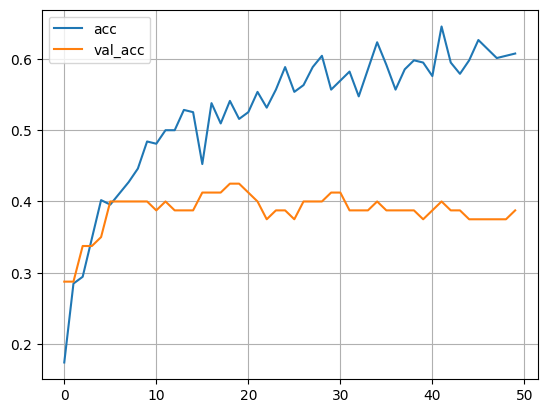

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4203 - loss: 0.9161 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9914808408309707
r2_score in Simulation Failt  void  for Each Blade :  0.9815182623408106
Error in Simulation Fault for Each Blade :  -0.07335197298436658  --- r2_score Fault S ----  0.9893605389434842
Error in Simulation Fault T  for Each Blade :  -0.07335197298436658  --- r2_score Fault T :  -0.8310035471727422
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9567592099472657
r2_score in Simulation Failt  void  for Each Blade :  0.9828934902944523
Error in Simulation Fault for Each Blade :  -0.5374101057530143  --- r2_score Fault S ----  0.990177705176886
Error in Simulation Fault T  for Each Blade :  -0.5374101057530143  --- r2_score Fault T :  -0.5841849731694291
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.2376 - loss: 1.4675 - val_acc: 0.3375 - val_loss: 1.3915
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2604 - loss: 1.3955 - val_acc: 0.3125 - val_loss: 1.3803
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2833 - loss: 1.3668 - val_acc: 0.3250 - val_loss: 1.3684
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3369 - loss: 1.3505 - val_acc: 0.3250 - val_loss: 1.3530
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2968 - loss: 1.3395 - val_acc: 0.3250 - val_loss: 1.3374
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3837 - loss: 1.2977 - val_acc: 0.3750 - val_loss: 1.3185
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3670 - loss: 1.2791 - val_acc: 0.3875 - val_loss: 1.3010
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4140 - loss: 1.2472 - val_acc: 0.3875 - val_loss: 1.2842
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4404 - loss: 1.2092 

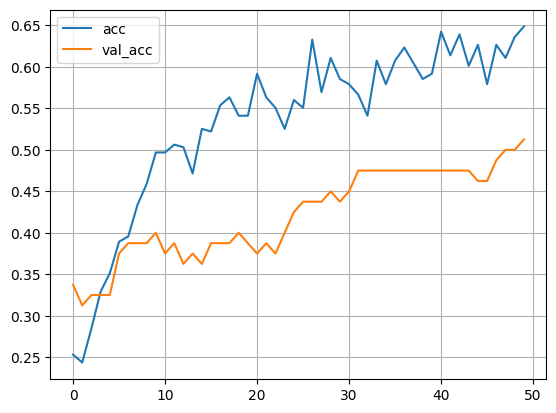

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5375 - loss: 0.8786 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9745950428723877
r2_score in Simulation Failt  void  for Each Blade :  0.9908227130271618
Error in Simulation Fault for Each Blade :  -0.8415956617207945  --- r2_score Fault S ----  0.9834807339700403
Error in Simulation Fault T  for Each Blade :  -0.8415956617207945  --- r2_score Fault T :  -0.30992030087254374
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9770926179967798
r2_score in Simulation Failt  void  for Each Blade :  0.9573317184175988
Error in Simulation Fault for Each Blade :  -0.0744973651362344  --- r2_score Fault S ----  0.9862538877229018
Error in Simulation Fault T  for Each Blade :  -0.0744973651362344  --- r2_score Fault T :  -1.0005838200118151
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.4000 - loss: 1.3349 - val_acc: 0.4750 - val_loss: 1.2694
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3983 - loss: 1.3208 - val_acc: 0.4375 - val_loss: 1.2525
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3785 - loss: 1.2952 - val_acc: 0.4250 - val_loss: 1.2360
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4272 - loss: 1.2593 - val_acc: 0.4125 - val_loss: 1.2202
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4547 - loss: 1.2276 - val_acc: 0.4250 - val_loss: 1.2039
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4693 - loss: 1.2186 - val_acc: 0.4375 - val_loss: 1.1847
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4526 - loss: 1.1677 - val_acc: 0.4375 - val_loss: 1.1669
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4771 - loss: 1.1796 - val_acc: 0.4875 - val_loss: 1.1482
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4883 - loss: 1.1370 - v

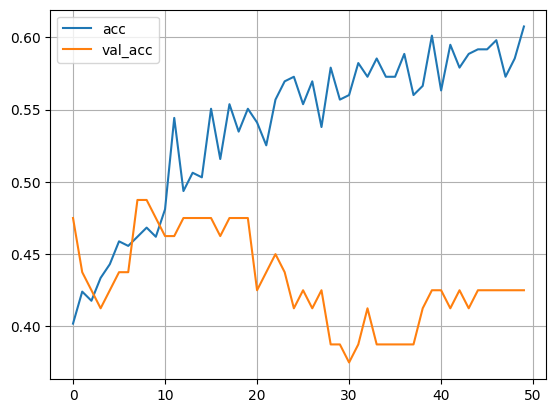

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4430 - loss: 0.8601 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9857445781407477
r2_score in Simulation Failt  void  for Each Blade :  0.983953166770017
Error in Simulation Fault for Each Blade :  -1.044542819132087  --- r2_score Fault S ----  0.9800814881979913
Error in Simulation Fault T  for Each Blade :  -1.044542819132087  --- r2_score Fault T :  -0.3970021550582461
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9890153094850578
r2_score in Simulation Failt  void  for Each Blade :  0.9749451348064073
Error in Simulation Fault for Each Blade :  -0.07687072887711244  --- r2_score Fault S ----  0.9862037186780894
Error in Simulation Fault T  for Each Blade :  -0.07687072887711244  --- r2_score Fault T :  -1.9431114849600015
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.3875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.2786 - loss: 1.4730 - val_acc: 0.2375 - val_loss: 1.4736
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2891 - loss: 1.4065 - val_acc: 0.2375 - val_loss: 1.4400
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2869 - loss: 1.4057 - val_acc: 0.2875 - val_loss: 1.4096
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3662 - loss: 1.3426 - val_acc: 0.3000 - val_loss: 1.3835
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2625 - loss: 1.3670 - val_acc: 0.2750 - val_loss: 1.3620
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3912 - loss: 1.3221 - val_acc: 0.3375 - val_loss: 1.3464
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4455 - loss: 1.3018 - val_acc: 0.3500 - val_loss: 1.3295
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3946 - loss: 1.3178 - val_acc: 0.3750 - val_loss: 1.3119
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4595 - loss: 1.24

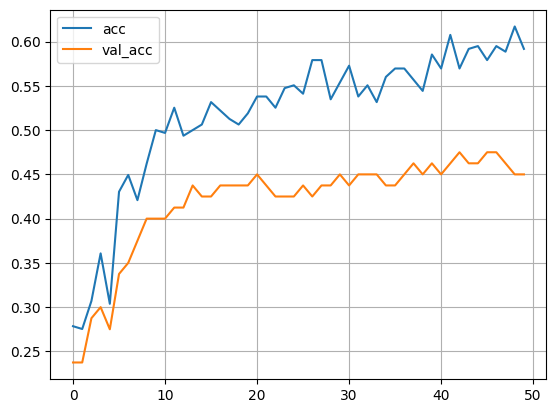

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4789 - loss: 0.9016 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9690198161982313
r2_score in Simulation Failt  void  for Each Blade :  0.978687517209632
Error in Simulation Fault for Each Blade :  0.8554089384950876  --- r2_score Fault S ----  0.9731534365732094
Error in Simulation Fault T  for Each Blade :  0.8554089384950876  --- r2_score Fault T :  -0.11140103104742605
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9618508129431651
r2_score in Simulation Failt  void  for Each Blade :  0.986498223726065
Error in Simulation Fault for Each Blade :  3.24986124933836  --- r2_score Fault S ----  0.9445506361912995
Error in Simulation Fault T  for Each Blade :  3.24986124933836  --- r2_score Fault T :  -1.0842858305135223
 ----- for each Blade Simulated ----- 
r2_score 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.2916 - loss: 1.4264 - val_acc: 0.2625 - val_loss: 1.3717
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3046 - loss: 1.3825 - val_acc: 0.3000 - val_loss: 1.3574
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3528 - loss: 1.3588 - val_acc: 0.3000 - val_loss: 1.3451
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3943 - loss: 1.3400 - val_acc: 0.3250 - val_loss: 1.3320
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3881 - loss: 1.3170 - val_acc: 0.3625 - val_loss: 1.3195
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3908 - loss: 1.3196 - val_acc: 0.3625 - val_loss: 1.3026
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4812 - loss: 1.2570 - val_acc: 0.3750 - val_loss: 1.2834
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4271 - loss: 1.2556 - val_acc: 0.3875 - val_loss: 1.2631
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4491 - loss: 1.2179 -

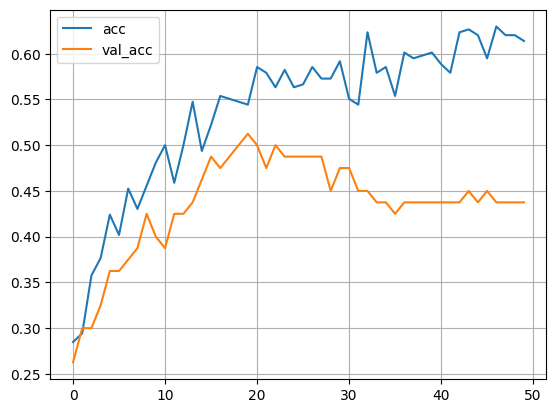

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4531 - loss: 0.9051 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9841154406216426
r2_score in Simulation Failt  void  for Each Blade :  0.9720262001313291
Error in Simulation Fault for Each Blade :  -0.4583783402578778  --- r2_score Fault S ----  0.961256387458381
Error in Simulation Fault T  for Each Blade :  -0.4583783402578778  --- r2_score Fault T :  -2.484961977966428
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9769715607938037
r2_score in Simulation Failt  void  for Each Blade :  0.9665511823912378
Error in Simulation Fault for Each Blade :  0.3868920621377341  --- r2_score Fault S ----  0.9853033865842812
Error in Simulation Fault T  for Each Blade :  0.3868920621377341  --- r2_score Fault T :  -1.3676399663557173
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2570 - loss: 1.4661 - val_acc: 0.2500 - val_loss: 1.4165
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2318 - loss: 1.4629 - val_acc: 0.2500 - val_loss: 1.3970
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2878 - loss: 1.3947 - val_acc: 0.3125 - val_loss: 1.3834
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2604 - loss: 1.3886 - val_acc: 0.3250 - val_loss: 1.3738
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3234 - loss: 1.3362 - val_acc: 0.3375 - val_loss: 1.3645
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3283 - loss: 1.3418 - val_acc: 0.3625 - val_loss: 1.3563
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3607 - loss: 1.3429 - val_acc: 0.3875 - val_loss: 1.3490
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4079 - loss: 1.2780 - val_acc: 0.3750 - val_loss: 1.3423
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4065 - loss: 1.2734 - v

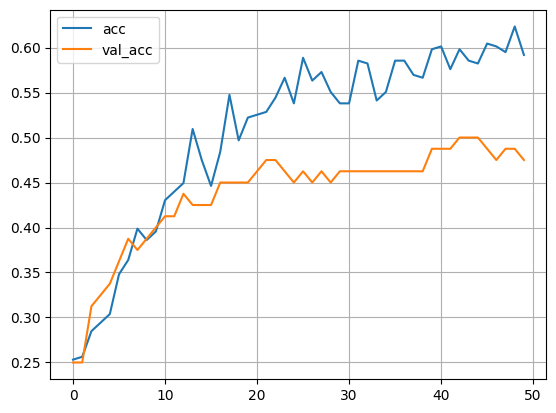

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5031 - loss: 0.8787 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9717487947960468
r2_score in Simulation Failt  void  for Each Blade :  0.9636193768667332
Error in Simulation Fault for Each Blade :  -0.5596000500895286  --- r2_score Fault S ----  0.9752479467303792
Error in Simulation Fault T  for Each Blade :  -0.5596000500895286  --- r2_score Fault T :  -2.6259078253017507
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9815146848830751
r2_score in Simulation Failt  void  for Each Blade :  0.9780599150562729
Error in Simulation Fault for Each Blade :  0.35551054495336065  --- r2_score Fault S ----  0.9878910955790435
Error in Simulation Fault T  for Each Blade :  0.35551054495336065  --- r2_score Fault T :  -1.0641713695365662
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.2881 - loss: 1.3910 - val_acc: 0.3750 - val_loss: 1.3495
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3265 - loss: 1.3545 - val_acc: 0.3875 - val_loss: 1.3310
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3803 - loss: 1.3232 - val_acc: 0.4375 - val_loss: 1.3164
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3844 - loss: 1.3033 - val_acc: 0.4250 - val_loss: 1.3026
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4403 - loss: 1.2606 - val_acc: 0.3875 - val_loss: 1.2903
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4478 - loss: 1.2492 - val_acc: 0.4000 - val_loss: 1.2809
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4470 - loss: 1.2304 - val_acc: 0.4125 - val_loss: 1.2700
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5195 - loss: 1.1804 - val_acc: 0.4375 - val_loss: 1.2564
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5653 - loss: 1.154

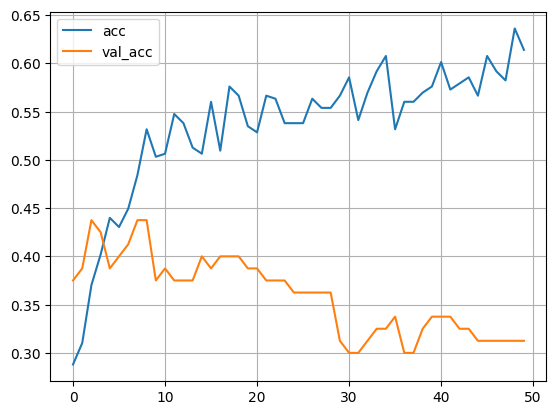

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3320 - loss: 0.9553 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9931287793164492
r2_score in Simulation Failt  void  for Each Blade :  0.9818367074771354
Error in Simulation Fault for Each Blade :  1.2022918733826644  --- r2_score Fault S ----  0.9763525530942637
Error in Simulation Fault T  for Each Blade :  1.2022918733826644  --- r2_score Fault T :  -2.5558817998532657
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9729187388835313
r2_score in Simulation Failt  void  for Each Blade :  0.9890795997771293
Error in Simulation Fault for Each Blade :  1.0059591317539929  --- r2_score Fault S ----  0.9810928038034784
Error in Simulation Fault T  for Each Blade :  1.0059591317539929  --- r2_score Fault T :  0.032149913917572825
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.2897 - loss: 1.4089 - val_acc: 0.2500 - val_loss: 1.3976
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3113 - loss: 1.3850 - val_acc: 0.2500 - val_loss: 1.3879
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3509 - loss: 1.3584 - val_acc: 0.2625 - val_loss: 1.3801
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3380 - loss: 1.3514 - val_acc: 0.3125 - val_loss: 1.3723
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4163 - loss: 1.3364 - val_acc: 0.3250 - val_loss: 1.3647
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3939 - loss: 1.3291 - val_acc: 0.3000 - val_loss: 1.3538
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4094 - loss: 1.3062 - val_acc: 0.3000 - val_loss: 1.3434
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4206 - loss: 1.2934 - val_acc: 0.3625 - val_loss: 1.3286
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4541 - loss: 1.2591 - 

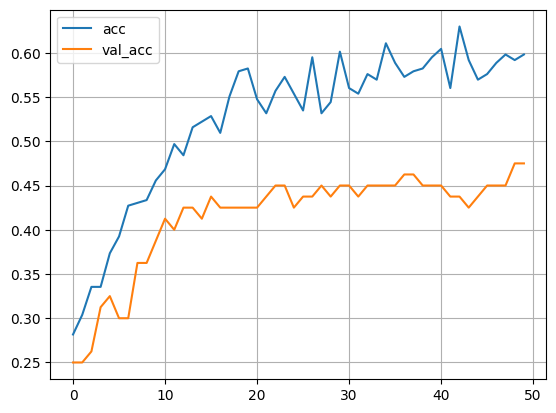

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5344 - loss: 0.8851 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9758414218310507
r2_score in Simulation Failt  void  for Each Blade :  0.9847576919507878
Error in Simulation Fault for Each Blade :  0.5450667372427795  --- r2_score Fault S ----  0.9823660489998095
Error in Simulation Fault T  for Each Blade :  0.5450667372427795  --- r2_score Fault T :  -0.7998690375407422
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9842883300782235
r2_score in Simulation Failt  void  for Each Blade :  0.970536464277086
Error in Simulation Fault for Each Blade :  0.3791965583585466  --- r2_score Fault S ----  0.9819171246687126
Error in Simulation Fault T  for Each Blade :  0.3791965583585466  --- r2_score Fault T :  -1.3970164498545268
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.3051 - loss: 1.4276 - val_acc: 0.2750 - val_loss: 1.4110
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3384 - loss: 1.3890 - val_acc: 0.2625 - val_loss: 1.3859
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3376 - loss: 1.3406 - val_acc: 0.2500 - val_loss: 1.3671
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3832 - loss: 1.3026 - val_acc: 0.2750 - val_loss: 1.3550
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3871 - loss: 1.2922 - val_acc: 0.2625 - val_loss: 1.3432
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3962 - loss: 1.2794 - val_acc: 0.2625 - val_loss: 1.3306
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3697 - loss: 1.2771 - val_acc: 0.3000 - val_loss: 1.3159
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3986 - loss: 1.2310 - val_acc: 0.3250 - val_loss: 1.2980
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4608 - loss: 1.1867 - 

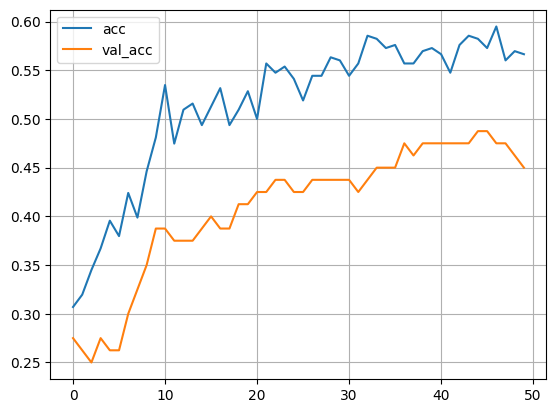

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4828 - loss: 0.8938 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9925220228113011
r2_score in Simulation Failt  void  for Each Blade :  0.9831603096621423
Error in Simulation Fault for Each Blade :  1.3679452307610531  --- r2_score Fault S ----  0.9760808745647778
Error in Simulation Fault T  for Each Blade :  1.3679452307610531  --- r2_score Fault T :  -0.47311659035247944
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9927750670888744
r2_score in Simulation Failt  void  for Each Blade :  0.9467216962800117
Error in Simulation Fault for Each Blade :  -0.011333461630677055  --- r2_score Fault S ----  0.9769899156800125
Error in Simulation Fault T  for Each Blade :  -0.011333461630677055  --- r2_score Fault T :  -1.1141648962026145
 ----- for each Blade Simulated ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2904 - loss: 1.3935 - val_acc: 0.2750 - val_loss: 1.4070
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3417 - loss: 1.3544 - val_acc: 0.3000 - val_loss: 1.3748
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3452 - loss: 1.3111 - val_acc: 0.3250 - val_loss: 1.3461
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4149 - loss: 1.2605 - val_acc: 0.3875 - val_loss: 1.3174
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4585 - loss: 1.2228 - val_acc: 0.4125 - val_loss: 1.2941
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4797 - loss: 1.1947 - val_acc: 0.3750 - val_loss: 1.2699
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4373 - loss: 1.1977 - val_acc: 0.3750 - val_loss: 1.2460
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5394 - loss: 1.1571 - val_acc: 0.3625 - val_loss: 1.2220
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4902 - loss: 1.1370 - v

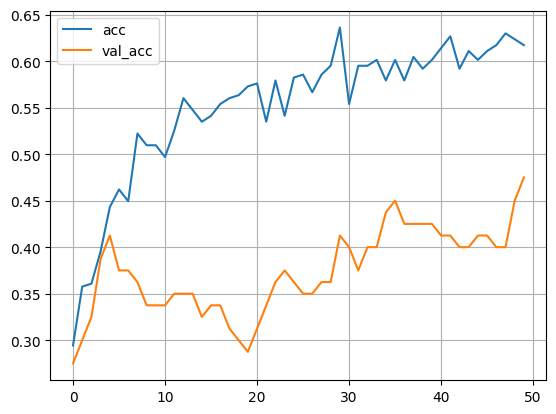

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5148 - loss: 0.9094 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9941927710793833
r2_score in Simulation Failt  void  for Each Blade :  0.9899494167539541
Error in Simulation Fault for Each Blade :  -0.29078063792163933  --- r2_score Fault S ----  0.9875743315274252
Error in Simulation Fault T  for Each Blade :  -0.29078063792163933  --- r2_score Fault T :  -1.184917013290713
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9852547639866498
r2_score in Simulation Failt  void  for Each Blade :  0.9720256412366253
Error in Simulation Fault for Each Blade :  -2.8850592406562727  --- r2_score Fault S ----  0.9663591847091547
Error in Simulation Fault T  for Each Blade :  -2.8850592406562727  --- r2_score Fault T :  -0.6562697876768717
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.2710 - loss: 1.4064 - val_acc: 0.2250 - val_loss: 1.3838
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2328 - loss: 1.4192 - val_acc: 0.2125 - val_loss: 1.3748
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2506 - loss: 1.3872 - val_acc: 0.2625 - val_loss: 1.3691
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2921 - loss: 1.3459 - val_acc: 0.2250 - val_loss: 1.3634
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3131 - loss: 1.3443 - val_acc: 0.2500 - val_loss: 1.3577
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3320 - loss: 1.3337 - val_acc: 0.2125 - val_loss: 1.3521
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3389 - loss: 1.3161 - val_acc: 0.2625 - val_loss: 1.3463
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3859 - loss: 1.3072 - val_acc: 0.3000 - val_loss: 1.3369
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4318 - loss: 1.2824 - v

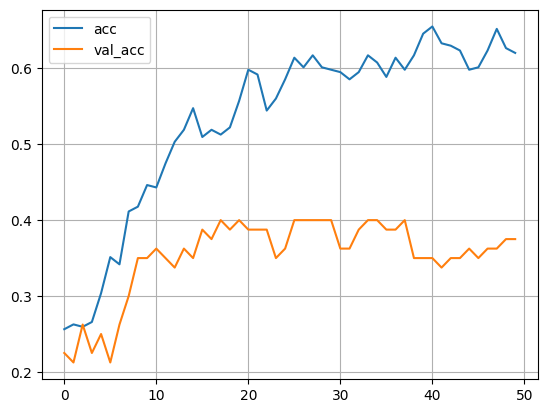

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4141 - loss: 0.9405 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9665158322383218
r2_score in Simulation Failt  void  for Each Blade :  0.9803591785387409
Error in Simulation Fault for Each Blade :  -0.23603556709145224  --- r2_score Fault S ----  0.9931226239801481
Error in Simulation Fault T  for Each Blade :  -0.23603556709145224  --- r2_score Fault T :  -1.5343208203582726
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9877715194014673
r2_score in Simulation Failt  void  for Each Blade :  0.9808707014295712
Error in Simulation Fault for Each Blade :  -0.009549422342095548  --- r2_score Fault S ----  0.9805728776469788
Error in Simulation Fault T  for Each Blade :  -0.009549422342095548  --- r2_score Fault T :  -0.6003564472282037
 ----- for each Blade Simulated -

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.3294 - loss: 1.4062 - val_acc: 0.2500 - val_loss: 1.4327
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3314 - loss: 1.3726 - val_acc: 0.2875 - val_loss: 1.3993
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4066 - loss: 1.3150 - val_acc: 0.3125 - val_loss: 1.3731
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4308 - loss: 1.3147 - val_acc: 0.3625 - val_loss: 1.3489
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4363 - loss: 1.2725 - val_acc: 0.3750 - val_loss: 1.3275
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4081 - loss: 1.2858 - val_acc: 0.3750 - val_loss: 1.3047
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4465 - loss: 1.2461 - val_acc: 0.3875 - val_loss: 1.2841
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4688 - loss: 1.2136 - val_acc: 0.4125 - val_loss: 1.2606
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5040 - loss: 1.16

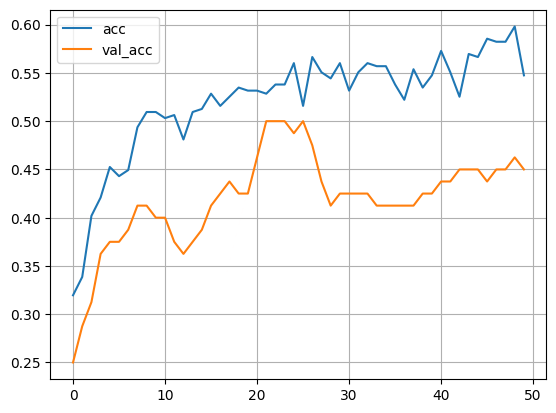

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5023 - loss: 0.8855 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9792270325622422
r2_score in Simulation Failt  void  for Each Blade :  0.9836443671365189
Error in Simulation Fault for Each Blade :  1.2520571355945407  --- r2_score Fault S ----  0.987247562533453
Error in Simulation Fault T  for Each Blade :  1.2520571355945407  --- r2_score Fault T :  -0.6392171201548427
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9728762010533762
r2_score in Simulation Failt  void  for Each Blade :  0.9773216099658306
Error in Simulation Fault for Each Blade :  -1.2805441673991922  --- r2_score Fault S ----  0.9817659346253274
Error in Simulation Fault T  for Each Blade :  -1.2805441673991922  --- r2_score Fault T :  -1.69285732476378
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.3550 - loss: 1.3746 - val_acc: 0.3250 - val_loss: 1.3386
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3582 - loss: 1.3449 - val_acc: 0.3000 - val_loss: 1.3290
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3805 - loss: 1.3022 - val_acc: 0.2750 - val_loss: 1.3214
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3527 - loss: 1.2997 - val_acc: 0.2625 - val_loss: 1.3120
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3706 - loss: 1.2789 - val_acc: 0.3125 - val_loss: 1.3000
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4125 - loss: 1.2602 - val_acc: 0.3125 - val_loss: 1.2844
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4161 - loss: 1.2337 - val_acc: 0.3500 - val_loss: 1.2706
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4302 - loss: 1.2063 - val_acc: 0.3500 - val_loss: 1.2529
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4947 - loss: 1.1964 

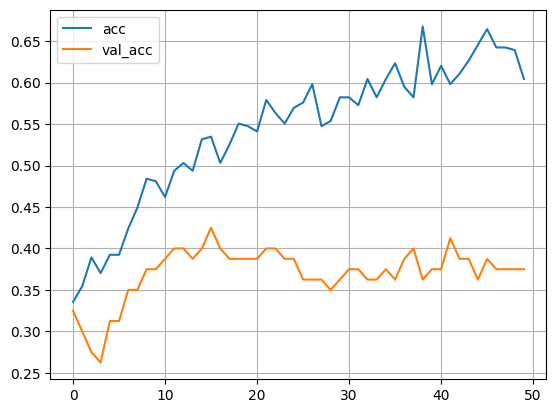

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4062 - loss: 0.9367 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9874712920756933
r2_score in Simulation Failt  void  for Each Blade :  0.9730640856722245
Error in Simulation Fault for Each Blade :  -1.1041517512808388  --- r2_score Fault S ----  0.9784603244739947
Error in Simulation Fault T  for Each Blade :  -1.1041517512808388  --- r2_score Fault T :  -0.6245333055076048
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9796847133085633
r2_score in Simulation Failt  void  for Each Blade :  0.9858304987715544
Error in Simulation Fault for Each Blade :  -0.8175617281657792  --- r2_score Fault S ----  0.9831586913376105
Error in Simulation Fault T  for Each Blade :  -0.8175617281657792  --- r2_score Fault T :  -1.2336657987873765
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.2428 - loss: 1.5108 - val_acc: 0.2500 - val_loss: 1.4383
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2358 - loss: 1.4683 - val_acc: 0.2875 - val_loss: 1.4211
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2312 - loss: 1.4243 - val_acc: 0.2625 - val_loss: 1.4076
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2382 - loss: 1.4222 - val_acc: 0.2750 - val_loss: 1.3969
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2313 - loss: 1.4005 - val_acc: 0.2750 - val_loss: 1.3873
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2604 - loss: 1.3920 - val_acc: 0.3375 - val_loss: 1.3776
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3581 - loss: 1.3705 - val_acc: 0.3875 - val_loss: 1.3691
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3516 - loss: 1.3575 - val_acc: 0.3625 - val_loss: 1.3619
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4033 - loss: 1.3438 - 

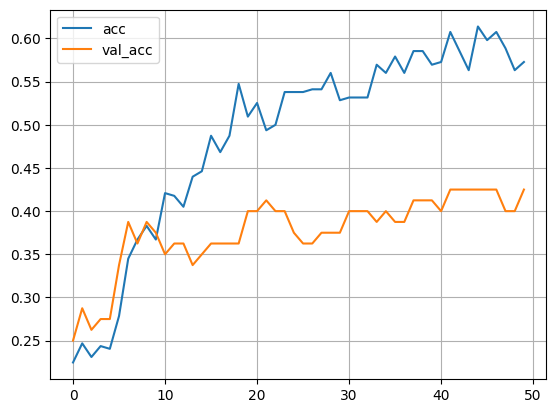

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4586 - loss: 0.9051 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9779229427156728
r2_score in Simulation Failt  void  for Each Blade :  0.9867571897059385
Error in Simulation Fault for Each Blade :  -1.160763045606371  --- r2_score Fault S ----  0.9851931090207223
Error in Simulation Fault T  for Each Blade :  -1.160763045606371  --- r2_score Fault T :  -1.3019095077369611
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9812377511027386
r2_score in Simulation Failt  void  for Each Blade :  0.9845791899357098
Error in Simulation Fault for Each Blade :  -0.6631360868465153  --- r2_score Fault S ----  0.9801343382794673
Error in Simulation Fault T  for Each Blade :  -0.6631360868465153  --- r2_score Fault T :  -2.255661274108265
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.2701 - loss: 1.4065 - val_acc: 0.1750 - val_loss: 1.4302
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3270 - loss: 1.4109 - val_acc: 0.2250 - val_loss: 1.4058
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3821 - loss: 1.3450 - val_acc: 0.2750 - val_loss: 1.3851
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4339 - loss: 1.2955 - val_acc: 0.3125 - val_loss: 1.3707
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3897 - loss: 1.2859 - val_acc: 0.3125 - val_loss: 1.3554
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3994 - loss: 1.3118 - val_acc: 0.3125 - val_loss: 1.3410
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4313 - loss: 1.2659 - val_acc: 0.3250 - val_loss: 1.3270
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4887 - loss: 1.2396 - val_acc: 0.3250 - val_loss: 1.3122
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4369 - loss: 1.

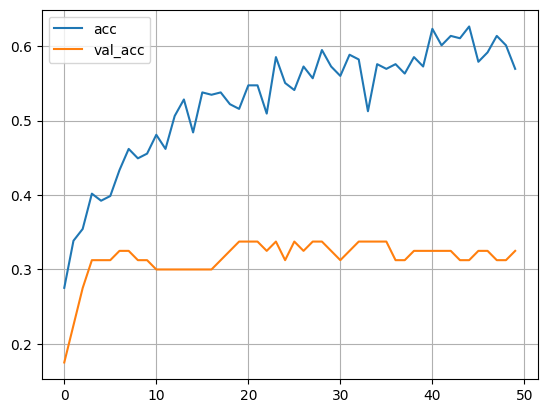

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3422 - loss: 0.9734 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9886523177947252
r2_score in Simulation Failt  void  for Each Blade :  0.9818284451500872
Error in Simulation Fault for Each Blade :  1.5909985246643892  --- r2_score Fault S ----  0.9639513101924287
Error in Simulation Fault T  for Each Blade :  1.5909985246643892  --- r2_score Fault T :  -1.203258334969464
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.98118236220449
r2_score in Simulation Failt  void  for Each Blade :  0.9814061769044485
Error in Simulation Fault for Each Blade :  -3.8734539417221834  --- r2_score Fault S ----  0.9466482206170763
Error in Simulation Fault T  for Each Blade :  -3.8734539417221834  --- r2_score Fault T :  -0.802271857978629
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.2644 - loss: 1.4275 - val_acc: 0.1375 - val_loss: 1.4722
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2675 - loss: 1.4193 - val_acc: 0.1625 - val_loss: 1.4296
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2595 - loss: 1.4078 - val_acc: 0.2000 - val_loss: 1.3989
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3601 - loss: 1.3568 - val_acc: 0.2250 - val_loss: 1.3797
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3177 - loss: 1.3521 - val_acc: 0.3125 - val_loss: 1.3601
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3079 - loss: 1.3647 - val_acc: 0.3375 - val_loss: 1.3471
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3610 - loss: 1.3520 - val_acc: 0.3625 - val_loss: 1.3342
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3874 - loss: 1.3016 - val_acc: 0.3375 - val_loss: 1.3234
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4450 - loss: 1.2757 - v

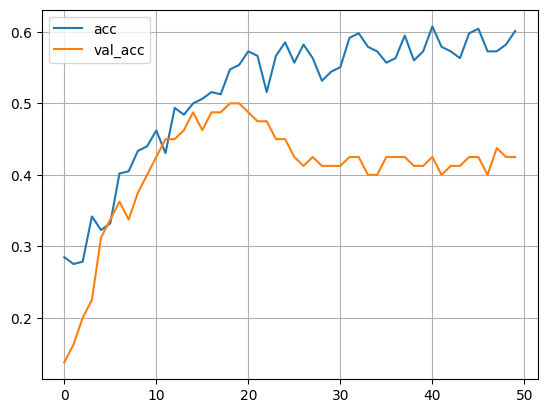

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4547 - loss: 0.8942 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9785362496606528
r2_score in Simulation Failt  void  for Each Blade :  0.9902197612396169
Error in Simulation Fault for Each Blade :  0.6323313997624984  --- r2_score Fault S ----  0.9564542960416598
Error in Simulation Fault T  for Each Blade :  0.6323313997624984  --- r2_score Fault T :  -1.89979241957553
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9886274902062473
r2_score in Simulation Failt  void  for Each Blade :  0.9781908405812896
Error in Simulation Fault for Each Blade :  1.1248320015285218  --- r2_score Fault S ----  0.9805065868405163
Error in Simulation Fault T  for Each Blade :  1.1248320015285218  --- r2_score Fault T :  -2.092041908734718
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - acc: 0.2348 - loss: 1.4416 - val_acc: 0.2875 - val_loss: 1.4057
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2392 - loss: 1.4270 - val_acc: 0.2875 - val_loss: 1.3899
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2675 - loss: 1.3880 - val_acc: 0.2750 - val_loss: 1.3766
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2677 - loss: 1.3692 - val_acc: 0.3250 - val_loss: 1.3672
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3329 - loss: 1.3527 - val_acc: 0.3500 - val_loss: 1.3585
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3371 - loss: 1.3468 - val_acc: 0.3625 - val_loss: 1.3496
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3018 - loss: 1.3365 - val_acc: 0.3500 - val_loss: 1.3408
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3424 - loss: 1.3222 - val_acc: 0.3875 - val_loss: 1.3308
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3419 - loss: 1.

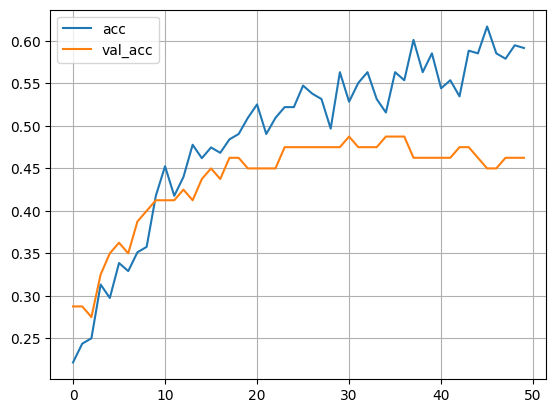

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4852 - loss: 0.8489 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.990493372364823
r2_score in Simulation Failt  void  for Each Blade :  0.9805678583201436
Error in Simulation Fault for Each Blade :  -0.5533547336130615  --- r2_score Fault S ----  0.9842023594631695
Error in Simulation Fault T  for Each Blade :  -0.5533547336130615  --- r2_score Fault T :  -0.10741862164961913
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9676858163465646
r2_score in Simulation Failt  void  for Each Blade :  0.9867748080591516
Error in Simulation Fault for Each Blade :  0.04928156029351394  --- r2_score Fault S ----  0.9932228431725064
Error in Simulation Fault T  for Each Blade :  0.04928156029351394  --- r2_score Fault T :  -1.2775498430864936
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.2560 - loss: 1.5131 - val_acc: 0.2375 - val_loss: 1.5009
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2345 - loss: 1.4918 - val_acc: 0.2625 - val_loss: 1.4627
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2563 - loss: 1.4665 - val_acc: 0.2750 - val_loss: 1.4371
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1942 - loss: 1.4409 - val_acc: 0.2875 - val_loss: 1.4173
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2600 - loss: 1.3923 - val_acc: 0.2625 - val_loss: 1.4007
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2990 - loss: 1.3766 - val_acc: 0.2875 - val_loss: 1.3871
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3061 - loss: 1.3903 - val_acc: 0.3000 - val_loss: 1.3748
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3494 - loss: 1.3486 - val_acc: 0.3375 - val_loss: 1.3615
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3975 - loss: 1.326

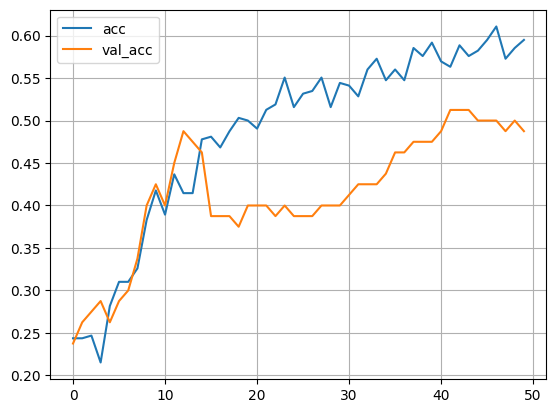

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5211 - loss: 0.8537 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9730526474267627
r2_score in Simulation Failt  void  for Each Blade :  0.971101373571504
Error in Simulation Fault for Each Blade :  1.1282810208654919  --- r2_score Fault S ----  0.9503330044636218
Error in Simulation Fault T  for Each Blade :  1.1282810208654919  --- r2_score Fault T :  -1.2232667164149467
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9843913066933035
r2_score in Simulation Failt  void  for Each Blade :  0.9547958070045529
Error in Simulation Fault for Each Blade :  -0.7970290261796968  --- r2_score Fault S ----  0.9852669434181303
Error in Simulation Fault T  for Each Blade :  -0.7970290261796968  --- r2_score Fault T :  -0.21247835991431696
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4625
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.2138 - loss: 1.4885 - val_acc: 0.2375 - val_loss: 1.4597
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2268 - loss: 1.4485 - val_acc: 0.2125 - val_loss: 1.4406
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2517 - loss: 1.3730 - val_acc: 0.2250 - val_loss: 1.4257
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3095 - loss: 1.3676 - val_acc: 0.2500 - val_loss: 1.4141
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3070 - loss: 1.3654 - val_acc: 0.2875 - val_loss: 1.4023
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3716 - loss: 1.3361 - val_acc: 0.2750 - val_loss: 1.3917
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3931 - loss: 1.3366 - val_acc: 0.3125 - val_loss: 1.3807
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4030 - loss: 1.3235 - val_acc: 0.3375 - val_loss: 1.3696
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4391 - loss: 1.2

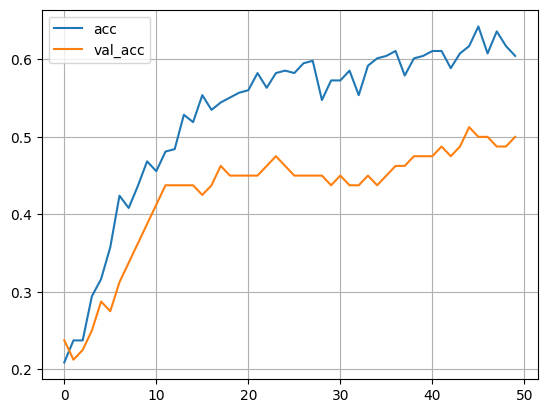

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5352 - loss: 0.8605 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9826067453920438
r2_score in Simulation Failt  void  for Each Blade :  0.9846089031420768
Error in Simulation Fault for Each Blade :  0.23612786518955353  --- r2_score Fault S ----  0.9764319264462408
Error in Simulation Fault T  for Each Blade :  0.23612786518955353  --- r2_score Fault T :  -1.5070753613819057
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9741938904009415
r2_score in Simulation Failt  void  for Each Blade :  0.9594378628830175
Error in Simulation Fault for Each Blade :  -0.7958597017922557  --- r2_score Fault S ----  0.9799578431756264
Error in Simulation Fault T  for Each Blade :  -0.7958597017922557  --- r2_score Fault T :  -1.7944793851283083
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.2483 - loss: 1.4954 - val_acc: 0.2250 - val_loss: 1.4340
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2381 - loss: 1.4907 - val_acc: 0.2500 - val_loss: 1.4034
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3110 - loss: 1.4380 - val_acc: 0.3125 - val_loss: 1.3853
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3416 - loss: 1.3709 - val_acc: 0.3375 - val_loss: 1.3715
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3354 - loss: 1.3383 - val_acc: 0.3625 - val_loss: 1.3556
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4121 - loss: 1.2989 - val_acc: 0.3875 - val_loss: 1.3406
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3945 - loss: 1.3011 - val_acc: 0.3750 - val_loss: 1.3242
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4388 - loss: 1.2927 - val_acc: 0.3625 - val_loss: 1.3093
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3756 - loss: 1.2

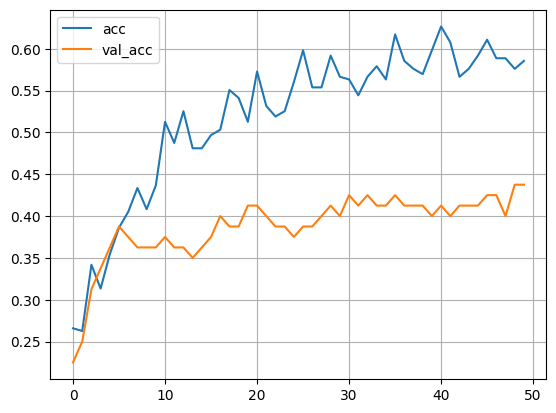

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4570 - loss: 0.9161 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9714822006838076
r2_score in Simulation Failt  void  for Each Blade :  0.9846490275598981
Error in Simulation Fault for Each Blade :  -0.3474447565942227  --- r2_score Fault S ----  0.9831717315177634
Error in Simulation Fault T  for Each Blade :  -0.3474447565942227  --- r2_score Fault T :  -0.07898032957962764
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9914566155564336
r2_score in Simulation Failt  void  for Each Blade :  0.9892675557817296
Error in Simulation Fault for Each Blade :  0.20724608462635263  --- r2_score Fault S ----  0.9882088406604855
Error in Simulation Fault T  for Each Blade :  0.20724608462635263  --- r2_score Fault T :  -0.1392383994591988
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.2259 - loss: 1.4682 - val_acc: 0.2500 - val_loss: 1.4278
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2536 - loss: 1.4199 - val_acc: 0.3125 - val_loss: 1.3980
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2760 - loss: 1.3927 - val_acc: 0.3375 - val_loss: 1.3761
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2679 - loss: 1.4015 - val_acc: 0.3500 - val_loss: 1.3585
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3116 - loss: 1.3583 - val_acc: 0.3500 - val_loss: 1.3419
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3026 - loss: 1.3674 - val_acc: 0.3625 - val_loss: 1.3292
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3572 - loss: 1.3329 - val_acc: 0.3875 - val_loss: 1.3150
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3668 - loss: 1.3400 - val_acc: 0.4000 - val_loss: 1.2995
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3877 - loss: 1.270

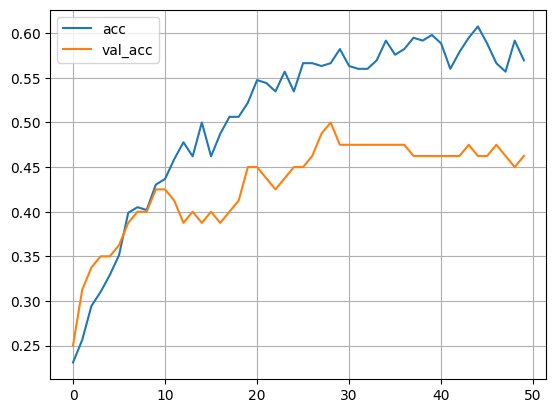

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4969 - loss: 0.8808 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9888780758905704
r2_score in Simulation Failt  void  for Each Blade :  0.9877398355830713
Error in Simulation Fault for Each Blade :  -1.3710986440483732  --- r2_score Fault S ----  0.9756078649889198
Error in Simulation Fault T  for Each Blade :  -1.3710986440483732  --- r2_score Fault T :  -1.3957797200239495
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9757788403741984
r2_score in Simulation Failt  void  for Each Blade :  0.9804140133895038
Error in Simulation Fault for Each Blade :  -1.6572573745917762  --- r2_score Fault S ----  0.9777757694166758
Error in Simulation Fault T  for Each Blade :  -1.6572573745917762  --- r2_score Fault T :  -0.6232191171942476
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.2362 - loss: 1.4853 - val_acc: 0.3000 - val_loss: 1.4244
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3042 - loss: 1.4186 - val_acc: 0.3000 - val_loss: 1.3956
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2972 - loss: 1.3790 - val_acc: 0.3375 - val_loss: 1.3729
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2641 - loss: 1.4011 - val_acc: 0.3625 - val_loss: 1.3534
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3690 - loss: 1.3171 - val_acc: 0.4250 - val_loss: 1.3390
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3669 - loss: 1.3154 - val_acc: 0.4500 - val_loss: 1.3230
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3537 - loss: 1.3190 - val_acc: 0.4250 - val_loss: 1.3088
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4113 - loss: 1.2688 - val_acc: 0.4500 - val_loss: 1.2926
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4689 - loss: 1.2238 - v

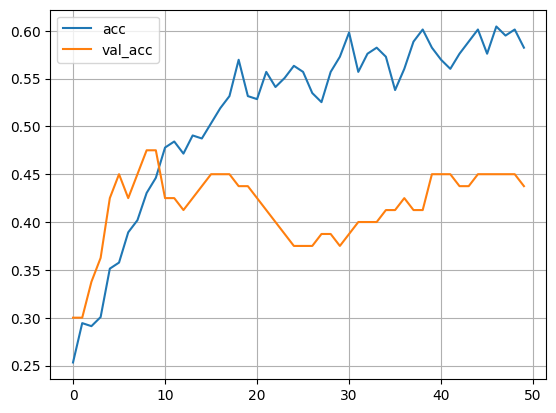

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4648 - loss: 0.9116 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9790391185358079
r2_score in Simulation Failt  void  for Each Blade :  0.9908086118286894
Error in Simulation Fault for Each Blade :  1.235162158796856  --- r2_score Fault S ----  0.9776586010467584
Error in Simulation Fault T  for Each Blade :  1.235162158796856  --- r2_score Fault T :  -4.52395590142296
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9791394453226172
r2_score in Simulation Failt  void  for Each Blade :  0.9821746358661352
Error in Simulation Fault for Each Blade :  2.688744292896125  --- r2_score Fault S ----  0.9318764298580795
Error in Simulation Fault T  for Each Blade :  2.688744292896125  --- r2_score Fault T :  -0.8758845861149986
 ----- for each Blade Simulated ----- 
r2_score i

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.2957 - loss: 1.6583 - val_acc: 0.2000 - val_loss: 1.7231
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2148 - loss: 1.5663 - val_acc: 0.1875 - val_loss: 1.6410
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2393 - loss: 1.4918 - val_acc: 0.1875 - val_loss: 1.5796
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3039 - loss: 1.4031 - val_acc: 0.1875 - val_loss: 1.5371
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3346 - loss: 1.3800 - val_acc: 0.1875 - val_loss: 1.5007
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3252 - loss: 1.3706 - val_acc: 0.2000 - val_loss: 1.4703
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3214 - loss: 1.3625 - val_acc: 0.2375 - val_loss: 1.4438
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3634 - loss: 1.3392 - val_acc: 0.2750 - val_loss: 1.4201
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4395 - loss: 1.3100 - 

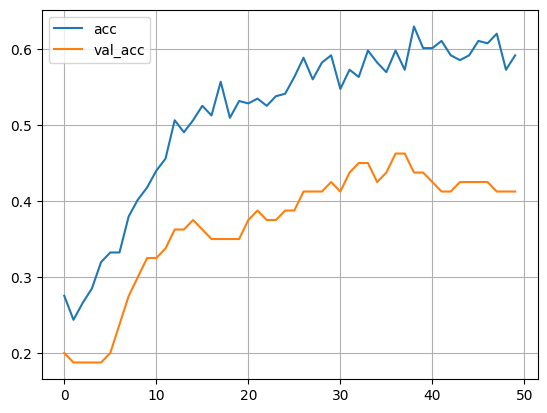

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4289 - loss: 0.9080 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.97082242727866
r2_score in Simulation Failt  void  for Each Blade :  0.9595927692297228
Error in Simulation Fault for Each Blade :  2.170626808711252  --- r2_score Fault S ----  0.938261044895022
Error in Simulation Fault T  for Each Blade :  2.170626808711252  --- r2_score Fault T :  -1.157936940507588
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9819246194615054
r2_score in Simulation Failt  void  for Each Blade :  0.990186394845151
Error in Simulation Fault for Each Blade :  -0.4749101198847052  --- r2_score Fault S ----  0.9910758625323398
Error in Simulation Fault T  for Each Blade :  -0.4749101198847052  --- r2_score Fault T :  -1.1934129213760292
 ----- for each Blade Simulated ----- 
r2_score 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.1700 - loss: 1.5771 - val_acc: 0.1750 - val_loss: 1.6255
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2322 - loss: 1.5172 - val_acc: 0.1875 - val_loss: 1.5453
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3143 - loss: 1.3945 - val_acc: 0.2000 - val_loss: 1.4871
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2767 - loss: 1.4294 - val_acc: 0.2250 - val_loss: 1.4425
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2999 - loss: 1.3699 - val_acc: 0.2750 - val_loss: 1.4079
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3243 - loss: 1.3593 - val_acc: 0.3000 - val_loss: 1.3790
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3463 - loss: 1.3104 - val_acc: 0.3000 - val_loss: 1.3543
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3173 - loss: 1.3329 - val_acc: 0.3375 - val_loss: 1.3297
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3790 - loss: 1.2548 

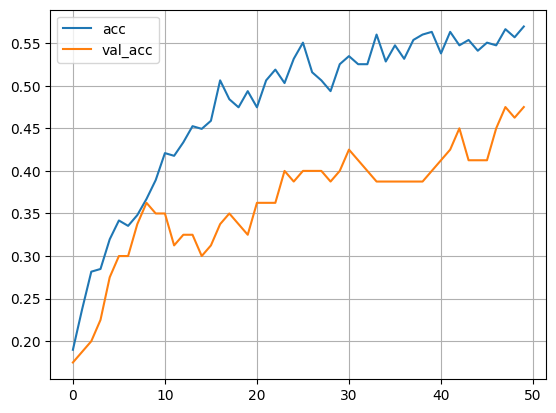

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5109 - loss: 0.9161 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9925638274145193
r2_score in Simulation Failt  void  for Each Blade :  0.9891220807728122
Error in Simulation Fault for Each Blade :  1.3200560646173187  --- r2_score Fault S ----  0.9639865786294429
Error in Simulation Fault T  for Each Blade :  1.3200560646173187  --- r2_score Fault T :  -1.957125426073596
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9815711787087417
r2_score in Simulation Failt  void  for Each Blade :  0.9892129590870893
Error in Simulation Fault for Each Blade :  -0.3880250955605735  --- r2_score Fault S ----  0.9805553762260122
Error in Simulation Fault T  for Each Blade :  -0.3880250955605735  --- r2_score Fault T :  -1.8536293928085104
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4625
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.2172 - loss: 1.4925 - val_acc: 0.2125 - val_loss: 1.4327
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2450 - loss: 1.4207 - val_acc: 0.2000 - val_loss: 1.4151
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2584 - loss: 1.3793 - val_acc: 0.2625 - val_loss: 1.3943
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2177 - loss: 1.3959 - val_acc: 0.2750 - val_loss: 1.3781
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3181 - loss: 1.3589 - val_acc: 0.3250 - val_loss: 1.3638
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3471 - loss: 1.3158 - val_acc: 0.3500 - val_loss: 1.3533
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2937 - loss: 1.3562 - val_acc: 0.3750 - val_loss: 1.3378
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4206 - loss: 1.2925 - val_acc: 0.4250 - val_loss: 1.3227
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4424 - loss: 1.2854 - v

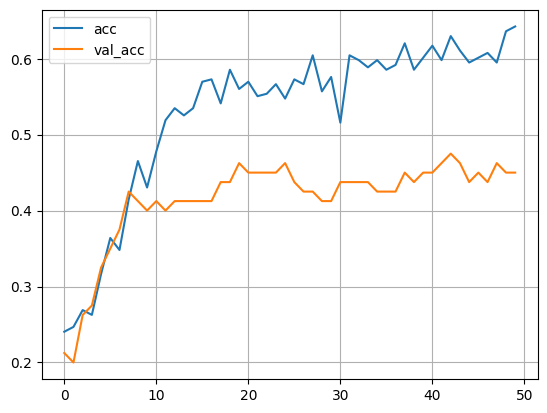

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4672 - loss: 0.8714
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9650018169858566
r2_score in Simulation Failt  void  for Each Blade :  0.9883700931270778
Error in Simulation Fault for Each Blade :  1.376077608781773  --- r2_score Fault S ----  0.9826436154893029
Error in Simulation Fault T  for Each Blade :  1.376077608781773  --- r2_score Fault T :  -4.291163782104017
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9838872800372386
r2_score in Simulation Failt  void  for Each Blade :  0.9943928524874214
Error in Simulation Fault for Each Blade :  0.28336279676004805  --- r2_score Fault S ----  0.9872437017938183
Error in Simulation Fault T  for Each Blade :  0.28336279676004805  --- r2_score Fault T :  -0.5438353468725863
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.2961 - loss: 1.3652 - val_acc: 0.2750 - val_loss: 1.4012
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3273 - loss: 1.3451 - val_acc: 0.3000 - val_loss: 1.3745
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3538 - loss: 1.3174 - val_acc: 0.3375 - val_loss: 1.3494
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3905 - loss: 1.2995 - val_acc: 0.3500 - val_loss: 1.3281
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4154 - loss: 1.2615 - val_acc: 0.3375 - val_loss: 1.3079
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4134 - loss: 1.2177 - val_acc: 0.3375 - val_loss: 1.2880
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3819 - loss: 1.2389 - val_acc: 0.3250 - val_loss: 1.2689
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4936 - loss: 1.1675 - val_acc: 0.3250 - val_loss: 1.2493
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4772 - loss: 1.1829 -

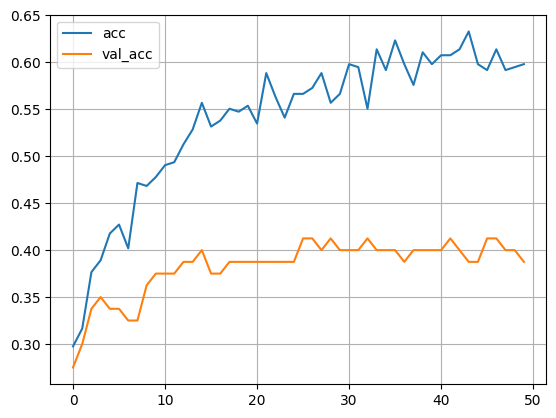

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4086 - loss: 0.9080 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9803080091576367
r2_score in Simulation Failt  void  for Each Blade :  0.9938897827403592
Error in Simulation Fault for Each Blade :  0.3854688792883145  --- r2_score Fault S ----  0.9871783206792323
Error in Simulation Fault T  for Each Blade :  0.3854688792883145  --- r2_score Fault T :  -0.9904292125712131
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9809273553183171
r2_score in Simulation Failt  void  for Each Blade :  0.9893954667319567
Error in Simulation Fault for Each Blade :  -0.12463510311642922  --- r2_score Fault S ----  0.9893624982009814
Error in Simulation Fault T  for Each Blade :  -0.12463510311642922  --- r2_score Fault T :  -0.07490648423439472
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.3007 - loss: 1.4301 - val_acc: 0.3875 - val_loss: 1.3234
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3041 - loss: 1.3803 - val_acc: 0.3625 - val_loss: 1.3081
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3619 - loss: 1.3380 - val_acc: 0.4125 - val_loss: 1.2938
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4107 - loss: 1.2791 - val_acc: 0.4375 - val_loss: 1.2762
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3846 - loss: 1.2890 - val_acc: 0.4125 - val_loss: 1.2581
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4515 - loss: 1.2413 - val_acc: 0.4125 - val_loss: 1.2404
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4489 - loss: 1.2194 - val_acc: 0.4125 - val_loss: 1.2196
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5294 - loss: 1.1600 - val_acc: 0.4000 - val_loss: 1.2006
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4827 - loss: 1.1119 

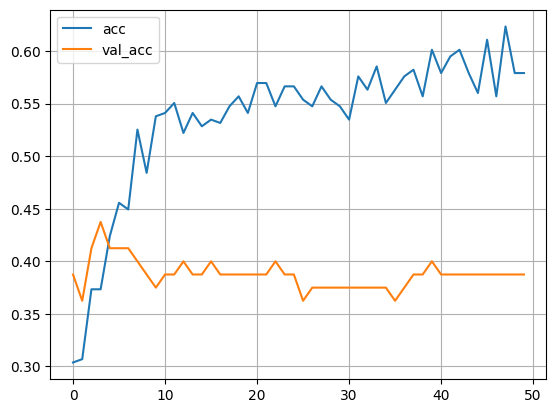

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4203 - loss: 0.9207 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9876312721133493
r2_score in Simulation Failt  void  for Each Blade :  0.9840303817409964
Error in Simulation Fault for Each Blade :  -0.7990190782442617  --- r2_score Fault S ----  0.9885592635137523
Error in Simulation Fault T  for Each Blade :  -0.7990190782442617  --- r2_score Fault T :  -1.8875036130458414
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9808996652546635
r2_score in Simulation Failt  void  for Each Blade :  0.9741524130058289
Error in Simulation Fault for Each Blade :  -1.2912957210883962  --- r2_score Fault S ----  0.9831767035339403
Error in Simulation Fault T  for Each Blade :  -1.2912957210883962  --- r2_score Fault T :  -0.48073237308317873
 ----- for each Blade Simulated ----- 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.1977 - loss: 1.5023 - val_acc: 0.1875 - val_loss: 1.4463
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1878 - loss: 1.4484 - val_acc: 0.1875 - val_loss: 1.4179
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2146 - loss: 1.4253 - val_acc: 0.2125 - val_loss: 1.3937
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2459 - loss: 1.3940 - val_acc: 0.2125 - val_loss: 1.3724
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2956 - loss: 1.3490 - val_acc: 0.2375 - val_loss: 1.3533
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3798 - loss: 1.3121 - val_acc: 0.2625 - val_loss: 1.3368
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3535 - loss: 1.3064 - val_acc: 0.3500 - val_loss: 1.3201
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4436 - loss: 1.2927 - val_acc: 0.3875 - val_loss: 1.3019
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4335 - loss: 1.2518

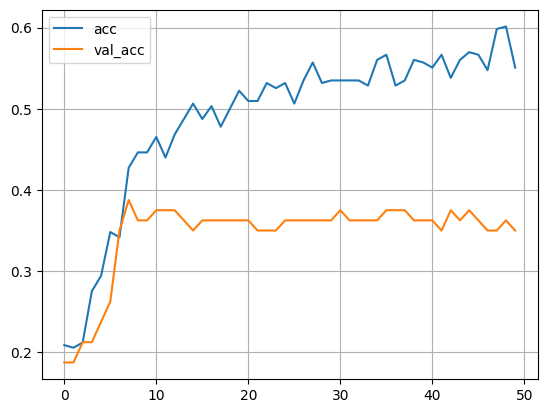

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3859 - loss: 0.9369
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9866934880694975
r2_score in Simulation Failt  void  for Each Blade :  0.989062762991086
Error in Simulation Fault for Each Blade :  -0.7000830823766431  --- r2_score Fault S ----  0.9844963447157067
Error in Simulation Fault T  for Each Blade :  -0.7000830823766431  --- r2_score Fault T :  -0.9848738199444584
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9867256808735405
r2_score in Simulation Failt  void  for Each Blade :  0.9778600744954038
Error in Simulation Fault for Each Blade :  -0.045607473036212376  --- r2_score Fault S ----  0.9873904150908858
Error in Simulation Fault T  for Each Blade :  -0.045607473036212376  --- r2_score Fault T :  -0.3186414380186162
 ----- for each Blade Simulated ----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2171 - loss: 1.4463 - val_acc: 0.2750 - val_loss: 1.3671
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2625 - loss: 1.3749 - val_acc: 0.3250 - val_loss: 1.3390
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2656 - loss: 1.3783 - val_acc: 0.3250 - val_loss: 1.3158
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3458 - loss: 1.3016 - val_acc: 0.3125 - val_loss: 1.2958
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4056 - loss: 1.2632 - val_acc: 0.3000 - val_loss: 1.2760
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4076 - loss: 1.2581 - val_acc: 0.3500 - val_loss: 1.2561
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4595 - loss: 1.2165 - val_acc: 0.3875 - val_loss: 1.2372
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4298 - loss: 1.2023 - val_acc: 0.3875 - val_loss: 1.2175
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4840 - loss: 1.1764 -

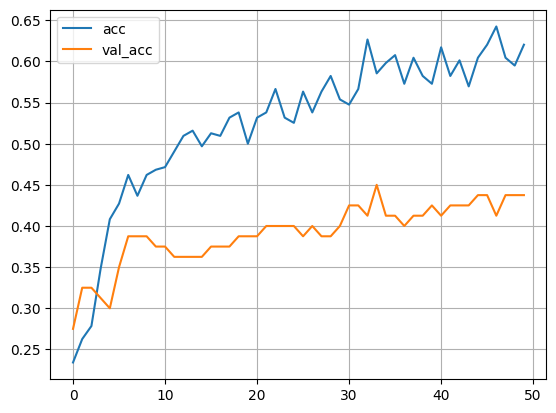

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4688 - loss: 0.9139 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9592104034842596
r2_score in Simulation Failt  void  for Each Blade :  0.9751772541701413
Error in Simulation Fault for Each Blade :  1.6348820393571084  --- r2_score Fault S ----  0.9666639816459778
Error in Simulation Fault T  for Each Blade :  1.6348820393571084  --- r2_score Fault T :  -0.5391432929677584
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9683875779925037
r2_score in Simulation Failt  void  for Each Blade :  0.9812313593428421
Error in Simulation Fault for Each Blade :  0.39490543233991193  --- r2_score Fault S ----  0.983690070382042
Error in Simulation Fault T  for Each Blade :  0.39490543233991193  --- r2_score Fault T :  -0.5712477462004184
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.2187 - loss: 1.4383 - val_acc: 0.2250 - val_loss: 1.4295
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2675 - loss: 1.3826 - val_acc: 0.2625 - val_loss: 1.3994
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3305 - loss: 1.3638 - val_acc: 0.3250 - val_loss: 1.3765
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3171 - loss: 1.3442 - val_acc: 0.3375 - val_loss: 1.3539
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3024 - loss: 1.3226 - val_acc: 0.3500 - val_loss: 1.3291
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3691 - loss: 1.2939 - val_acc: 0.3875 - val_loss: 1.3073
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3601 - loss: 1.2988 - val_acc: 0.3875 - val_loss: 1.2880
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4200 - loss: 1.2444 - val_acc: 0.4000 - val_loss: 1.2667
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4343 - loss: 1.1947 -

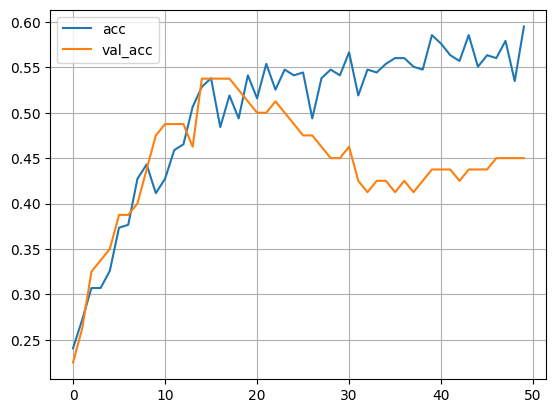

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4984 - loss: 0.8987 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9743607407808683
r2_score in Simulation Failt  void  for Each Blade :  0.9869968171835551
Error in Simulation Fault for Each Blade :  -1.2955210407319326  --- r2_score Fault S ----  0.9754872309758985
Error in Simulation Fault T  for Each Blade :  -1.2955210407319326  --- r2_score Fault T :  0.03739958116350972
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9756106723342108
r2_score in Simulation Failt  void  for Each Blade :  0.9912720635487617
Error in Simulation Fault for Each Blade :  -1.2426964451081373  --- r2_score Fault S ----  0.9714593668968766
Error in Simulation Fault T  for Each Blade :  -1.2426964451081373  --- r2_score Fault T :  -3.8820693596558833
 ----- for each Blade Simulated ----- 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.2539 - loss: 1.4218 - val_acc: 0.2750 - val_loss: 1.3740
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2903 - loss: 1.3998 - val_acc: 0.2750 - val_loss: 1.3679
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3514 - loss: 1.3358 - val_acc: 0.3000 - val_loss: 1.3627
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3480 - loss: 1.3526 - val_acc: 0.3000 - val_loss: 1.3558
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3492 - loss: 1.3498 - val_acc: 0.3000 - val_loss: 1.3492
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3858 - loss: 1.3258 - val_acc: 0.3250 - val_loss: 1.3417
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3832 - loss: 1.3353 - val_acc: 0.3250 - val_loss: 1.3326
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4086 - loss: 1.3037 - val_acc: 0.3375 - val_loss: 1.3230
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4616 - loss: 1.

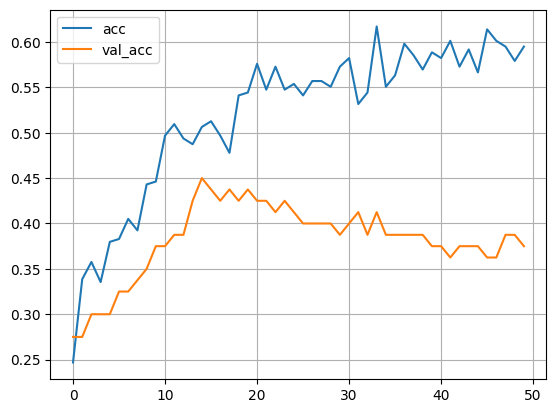

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3945 - loss: 0.9164 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9780981450410684
r2_score in Simulation Failt  void  for Each Blade :  0.9842124766485769
Error in Simulation Fault for Each Blade :  -0.324169154681601  --- r2_score Fault S ----  0.9919353353043525
Error in Simulation Fault T  for Each Blade :  -0.324169154681601  --- r2_score Fault T :  -1.2102435433908982
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9794906110123761
r2_score in Simulation Failt  void  for Each Blade :  0.9867709591035654
Error in Simulation Fault for Each Blade :  -0.774385315075989  --- r2_score Fault S ----  0.9777851692523465
Error in Simulation Fault T  for Each Blade :  -0.774385315075989  --- r2_score Fault T :  -1.3692701513975898
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.2478 - loss: 1.4669 - val_acc: 0.2750 - val_loss: 1.4218
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2477 - loss: 1.4167 - val_acc: 0.2500 - val_loss: 1.4033
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2706 - loss: 1.4029 - val_acc: 0.3000 - val_loss: 1.3885
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4099 - loss: 1.3501 - val_acc: 0.3250 - val_loss: 1.3740
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3258 - loss: 1.3619 - val_acc: 0.3250 - val_loss: 1.3624
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4130 - loss: 1.3147 - val_acc: 0.3250 - val_loss: 1.3513
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3931 - loss: 1.3138 - val_acc: 0.3125 - val_loss: 1.3395
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4270 - loss: 1.2863 - val_acc: 0.3250 - val_loss: 1.3262
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3964 - loss: 1.3

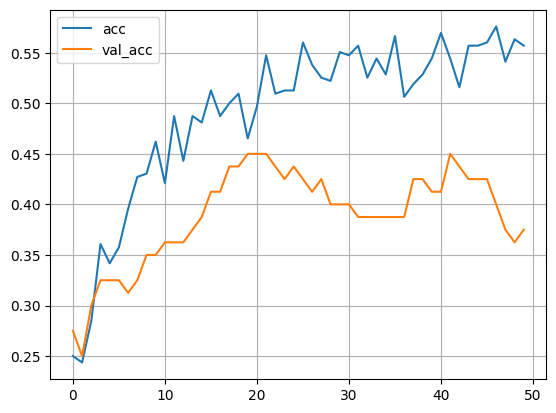

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3906 - loss: 0.8989 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9892588219446871
r2_score in Simulation Failt  void  for Each Blade :  0.9885381748178029
Error in Simulation Fault for Each Blade :  0.6253806044137573  --- r2_score Fault S ----  0.984139523847396
Error in Simulation Fault T  for Each Blade :  0.6253806044137573  --- r2_score Fault T :  -0.551120413706824
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.966635828425534
r2_score in Simulation Failt  void  for Each Blade :  0.9904176515330805
Error in Simulation Fault for Each Blade :  1.2671606079696307  --- r2_score Fault S ----  0.9915836847641525
Error in Simulation Fault T  for Each Blade :  1.2671606079696307  --- r2_score Fault T :  -1.1998490742675312
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.2770 - loss: 1.3846 - val_acc: 0.2750 - val_loss: 1.3697
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2805 - loss: 1.3739 - val_acc: 0.2875 - val_loss: 1.3448
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3908 - loss: 1.3084 - val_acc: 0.3375 - val_loss: 1.3221
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3605 - loss: 1.2885 - val_acc: 0.3500 - val_loss: 1.2987
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3877 - loss: 1.2930 - val_acc: 0.3375 - val_loss: 1.2752
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4134 - loss: 1.2353 - val_acc: 0.3375 - val_loss: 1.2537
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4522 - loss: 1.2038 - val_acc: 0.3375 - val_loss: 1.2304
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4669 - loss: 1.2006 - val_acc: 0.3500 - val_loss: 1.2081
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4555 - loss: 1.1578 

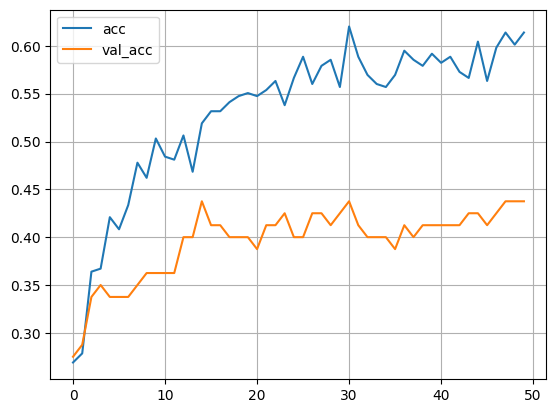

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4531 - loss: 0.8818 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9587567679429645
r2_score in Simulation Failt  void  for Each Blade :  0.9890564646630222
Error in Simulation Fault for Each Blade :  -0.5921021788036778  --- r2_score Fault S ----  0.9846801939724357
Error in Simulation Fault T  for Each Blade :  -0.5921021788036778  --- r2_score Fault T :  -1.1690819596231785
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9729254530444545
r2_score in Simulation Failt  void  for Each Blade :  0.9821090765296154
Error in Simulation Fault for Each Blade :  -0.22387733291687817  --- r2_score Fault S ----  0.9819767064687828
Error in Simulation Fault T  for Each Blade :  -0.22387733291687817  --- r2_score Fault T :  -1.1116472273194087
 ----- for each Blade Simulated -----

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2902 - loss: 1.3954 - val_acc: 0.2875 - val_loss: 1.3455
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3621 - loss: 1.3452 - val_acc: 0.3125 - val_loss: 1.3250
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3613 - loss: 1.3449 - val_acc: 0.3250 - val_loss: 1.3059
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4222 - loss: 1.2988 - val_acc: 0.3500 - val_loss: 1.2892
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4258 - loss: 1.2631 - val_acc: 0.3625 - val_loss: 1.2731
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4160 - loss: 1.2686 - val_acc: 0.3875 - val_loss: 1.2562
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4659 - loss: 1.2515 - val_acc: 0.4125 - val_loss: 1.2399
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4634 - loss: 1.2456 - val_acc: 0.4000 - val_loss: 1.2229
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5352 - loss: 1.1505 

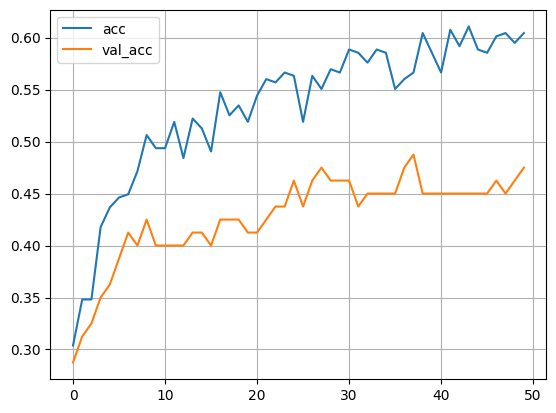

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5031 - loss: 0.8545 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9832630038497222
r2_score in Simulation Failt  void  for Each Blade :  0.9878748247328888
Error in Simulation Fault for Each Blade :  1.7314917499318287  --- r2_score Fault S ----  0.9471801250672984
Error in Simulation Fault T  for Each Blade :  1.7314917499318287  --- r2_score Fault T :  -0.5613496109864786
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9925882510947006
r2_score in Simulation Failt  void  for Each Blade :  0.9919330926280678
Error in Simulation Fault for Each Blade :  1.5869762117202528  --- r2_score Fault S ----  0.9861058019518073
Error in Simulation Fault T  for Each Blade :  1.5869762117202528  --- r2_score Fault T :  -6.333325881559759
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.2575 - loss: 1.4807 - val_acc: 0.3125 - val_loss: 1.4139
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2599 - loss: 1.4579 - val_acc: 0.2875 - val_loss: 1.3911
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2715 - loss: 1.4407 - val_acc: 0.3000 - val_loss: 1.3766
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.2657 - loss: 1.3854 - val_acc: 0.3125 - val_loss: 1.3654
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3122 - loss: 1.3662 - val_acc: 0.2875 - val_loss: 1.3567
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3062 - loss: 1.3278 - val_acc: 0.2875 - val_loss: 1.3462
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3574 - loss: 1.3312 - val_acc: 0.3125 - val_loss: 1.3352
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3696 - loss: 1.3279 - val_acc: 0.3250 - val_loss: 1.3218
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3625 - loss: 1.

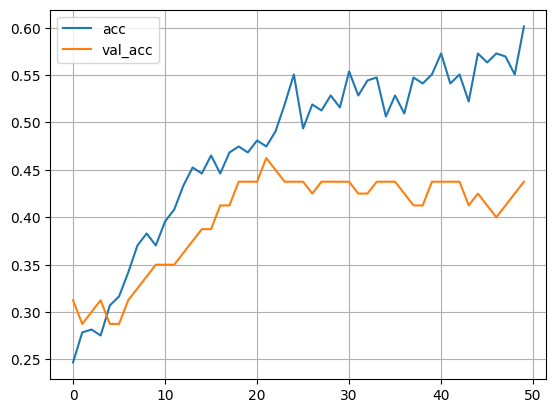

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4570 - loss: 0.8785 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9826137300788966
r2_score in Simulation Failt  void  for Each Blade :  0.9817596108325265
Error in Simulation Fault for Each Blade :  0.861747671961568  --- r2_score Fault S ----  0.9914068344003989
Error in Simulation Fault T  for Each Blade :  0.861747671961568  --- r2_score Fault T :  -1.508311975870373
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9910690591575062
r2_score in Simulation Failt  void  for Each Blade :  0.9746086626856199
Error in Simulation Fault for Each Blade :  1.428576188604552  --- r2_score Fault S ----  0.9712793419849735
Error in Simulation Fault T  for Each Blade :  1.428576188604552  --- r2_score Fault T :  -1.4783277281077565
 ----- for each Blade Simulated ----- 
r2_score 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - acc: 0.3372 - loss: 1.3839 - val_acc: 0.4000 - val_loss: 1.3135
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3823 - loss: 1.3631 - val_acc: 0.4250 - val_loss: 1.2966
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3928 - loss: 1.2980 - val_acc: 0.3875 - val_loss: 1.2814
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4210 - loss: 1.2654 - val_acc: 0.4250 - val_loss: 1.2686
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4084 - loss: 1.2400 - val_acc: 0.4125 - val_loss: 1.2559
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4953 - loss: 1.1794 - val_acc: 0.4250 - val_loss: 1.2417
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4016 - loss: 1.2064 - val_acc: 0.4125 - val_loss: 1.2278
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5236 - loss: 1.1301 - val_acc: 0.4125 - val_loss: 1.2143
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4706 - loss: 1.11

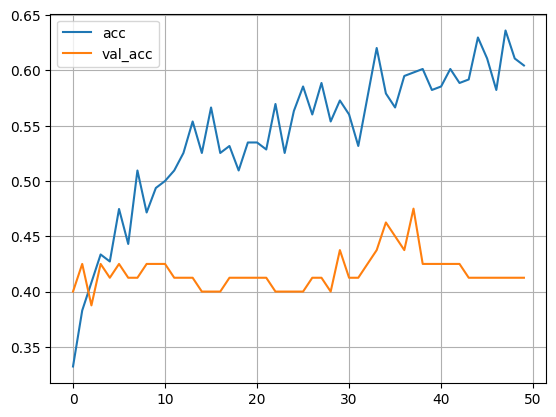

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4758 - loss: 0.9119 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9645121283976461
r2_score in Simulation Failt  void  for Each Blade :  0.9463242059284716
Error in Simulation Fault for Each Blade :  0.7538358562111074  --- r2_score Fault S ----  0.980176325332612
Error in Simulation Fault T  for Each Blade :  0.7538358562111074  --- r2_score Fault T :  -3.316637183752669
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9721988649312844
r2_score in Simulation Failt  void  for Each Blade :  0.9885753067944482
Error in Simulation Fault for Each Blade :  -1.0185209833291209  --- r2_score Fault S ----  0.9807954313246775
Error in Simulation Fault T  for Each Blade :  -1.0185209833291209  --- r2_score Fault T :  -1.4464842109898965
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.3182 - loss: 1.4318 - val_acc: 0.3875 - val_loss: 1.3386
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3526 - loss: 1.3546 - val_acc: 0.4625 - val_loss: 1.3206
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3817 - loss: 1.3408 - val_acc: 0.4875 - val_loss: 1.3025
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4221 - loss: 1.3019 - val_acc: 0.4500 - val_loss: 1.2845
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4159 - loss: 1.2708 - val_acc: 0.4250 - val_loss: 1.2641
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4330 - loss: 1.2488 - val_acc: 0.4375 - val_loss: 1.2444
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4409 - loss: 1.2219 - val_acc: 0.4500 - val_loss: 1.2233
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4814 - loss: 1.1848 - val_acc: 0.4375 - val_loss: 1.1990
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4934 - loss: 1.125

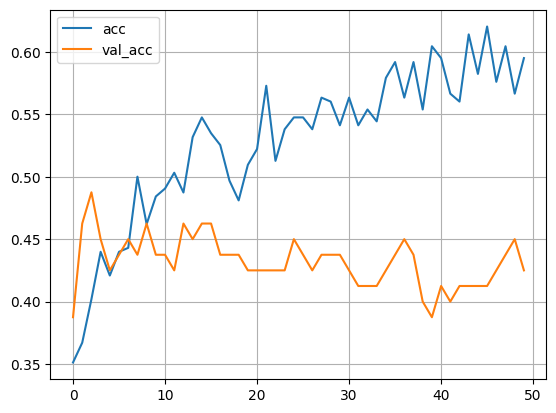

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4469 - loss: 0.9015 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9806198781197224
r2_score in Simulation Failt  void  for Each Blade :  0.9735039360938049
Error in Simulation Fault for Each Blade :  -2.5588852494195637  --- r2_score Fault S ----  0.9566720947247881
Error in Simulation Fault T  for Each Blade :  -2.5588852494195637  --- r2_score Fault T :  0.7803476887546593
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9656050206545153
r2_score in Simulation Failt  void  for Each Blade :  0.9837616585414658
Error in Simulation Fault for Each Blade :  0.6838841545544572  --- r2_score Fault S ----  0.9875485162039798
Error in Simulation Fault T  for Each Blade :  0.6838841545544572  --- r2_score Fault T :  -0.7190844371527678
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.2355 - loss: 1.5163 - val_acc: 0.1500 - val_loss: 1.4660
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2751 - loss: 1.4430 - val_acc: 0.1625 - val_loss: 1.4389
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2561 - loss: 1.4361 - val_acc: 0.1875 - val_loss: 1.4191
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3139 - loss: 1.3875 - val_acc: 0.2500 - val_loss: 1.4050
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3251 - loss: 1.3752 - val_acc: 0.2500 - val_loss: 1.3934
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2817 - loss: 1.3789 - val_acc: 0.2625 - val_loss: 1.3811
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3716 - loss: 1.3374 - val_acc: 0.2500 - val_loss: 1.3697
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3495 - loss: 1.3378 - val_acc: 0.2750 - val_loss: 1.3564
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4609 - loss: 1.2740 - 

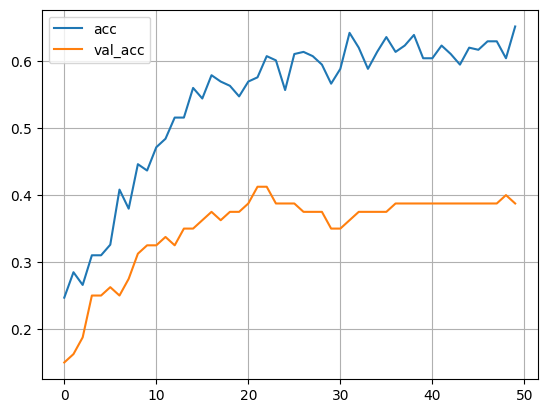

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4203 - loss: 0.9602 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 


In [29]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(3):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30 , alpha = 0.5    )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.7 )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 , alpha = 0.6  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} ")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.2 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30 , alpha = 0.5  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [30]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [31]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7539518955117543  - mean fault :  1.7538226043668292  - mean health :  1.7456035614565288


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

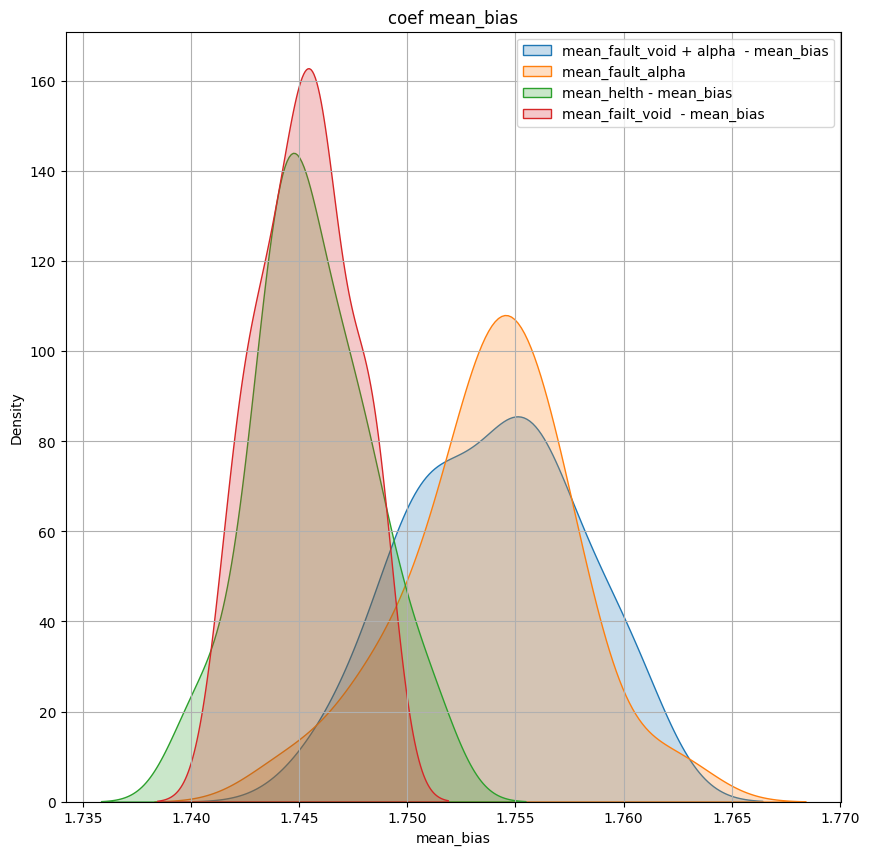

<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


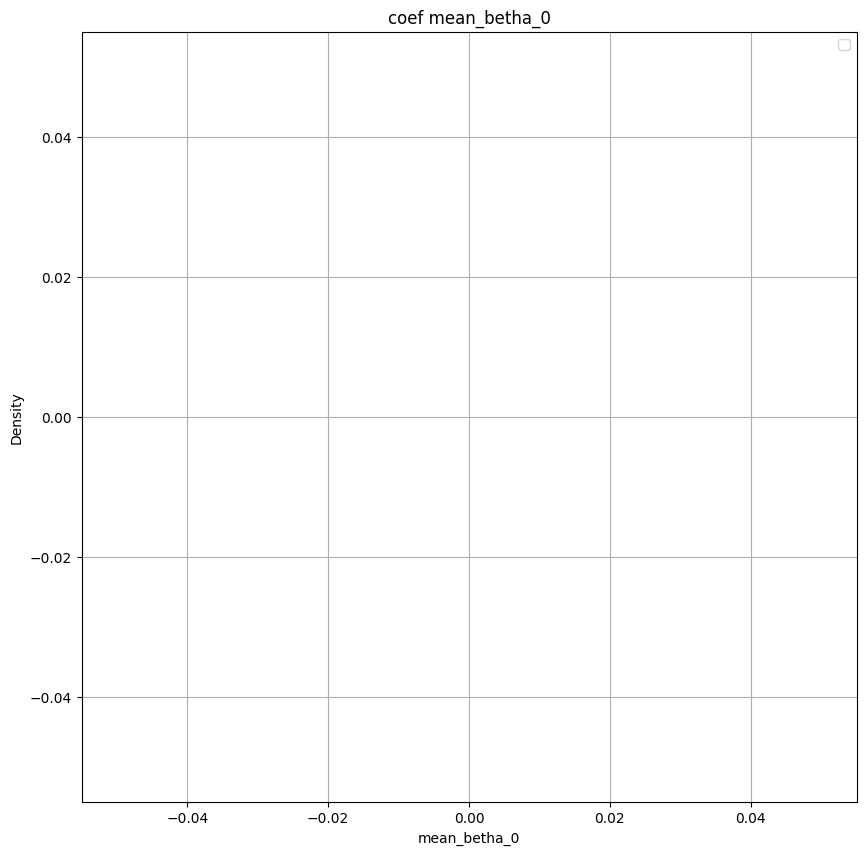

mean fault t :  -1.0647872028032108  - mean fault :  -1.0621450561284804  - mean health :  -1.0559660517113971


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

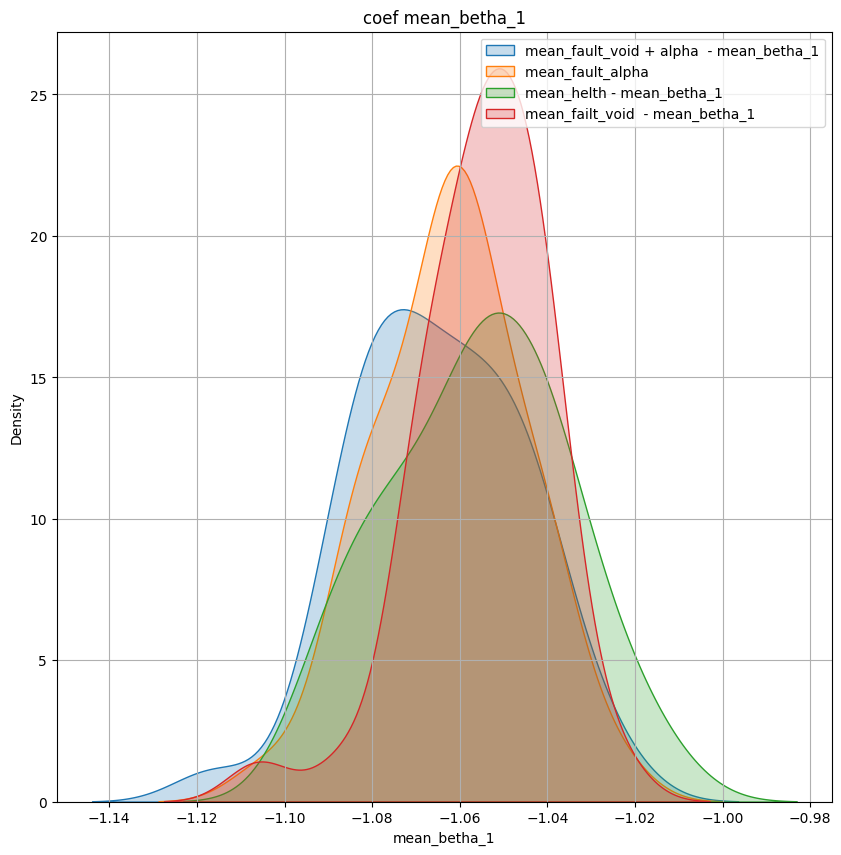

mean fault t :  -0.07608625851656463  - mean fault :  -0.07419028230765076  - mean health :  -0.07010331440822673


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

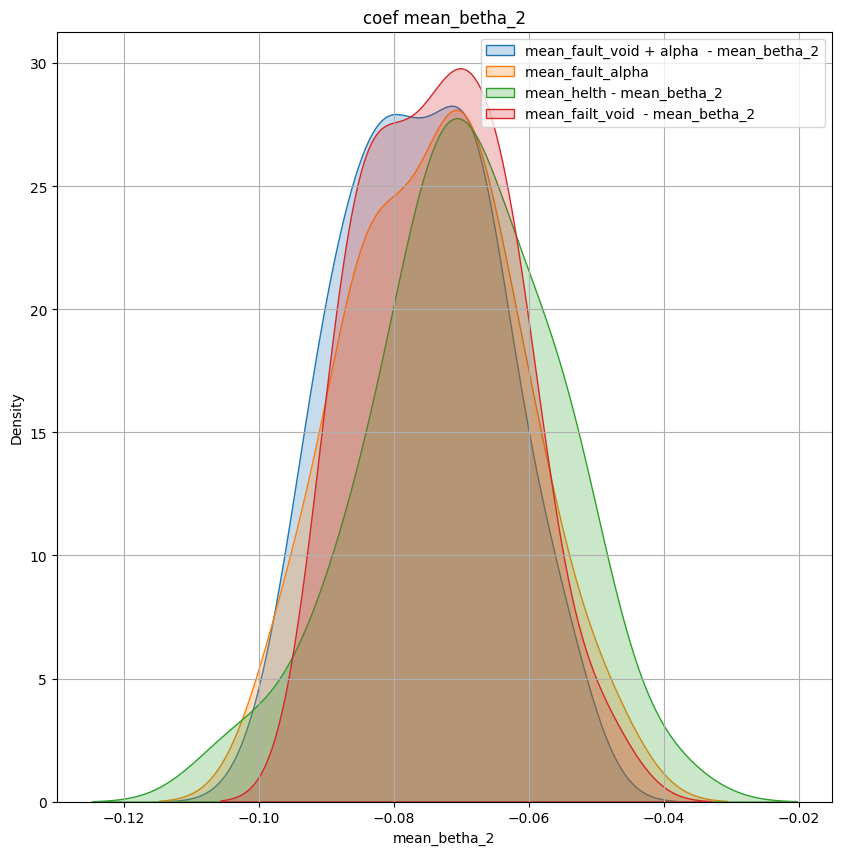

mean fault t :  2.811612684804333  - mean fault :  2.808459973450135  - mean health :  2.791803619916928


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

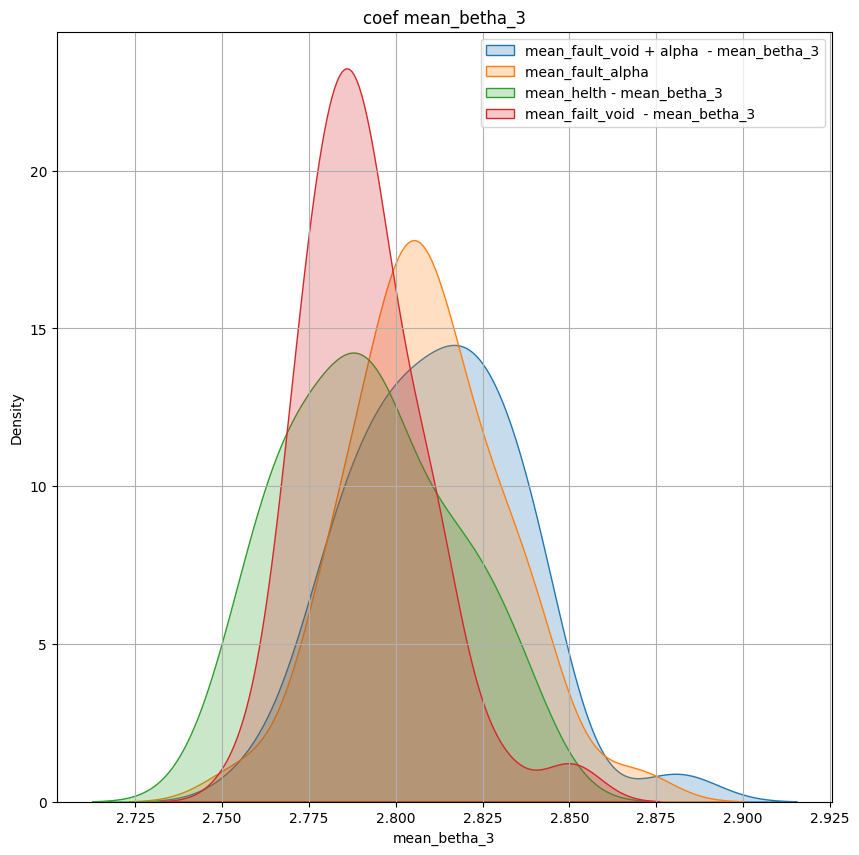

mean fault t :  0.08896269528239112  - mean fault :  0.08851318563689022  - mean health :  0.08548481802808859


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

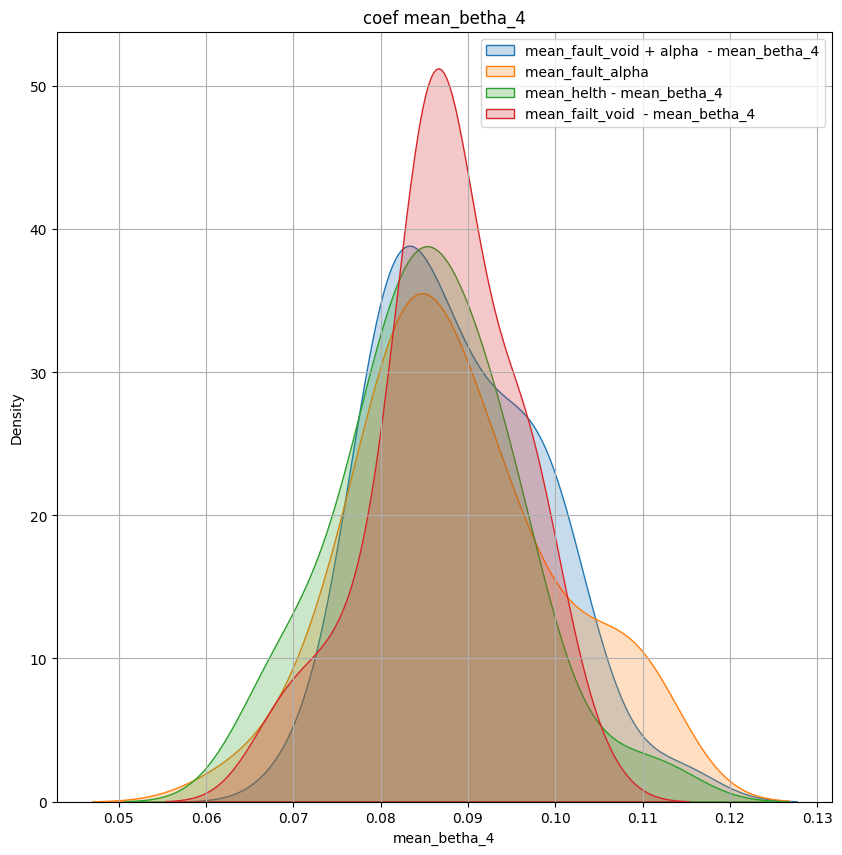

mean fault t :  -0.017220049573251107  - mean fault :  -0.015830465091482997  - mean health :  -0.013511231578278864


<ipython-input-32-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-32-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-32-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-32-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

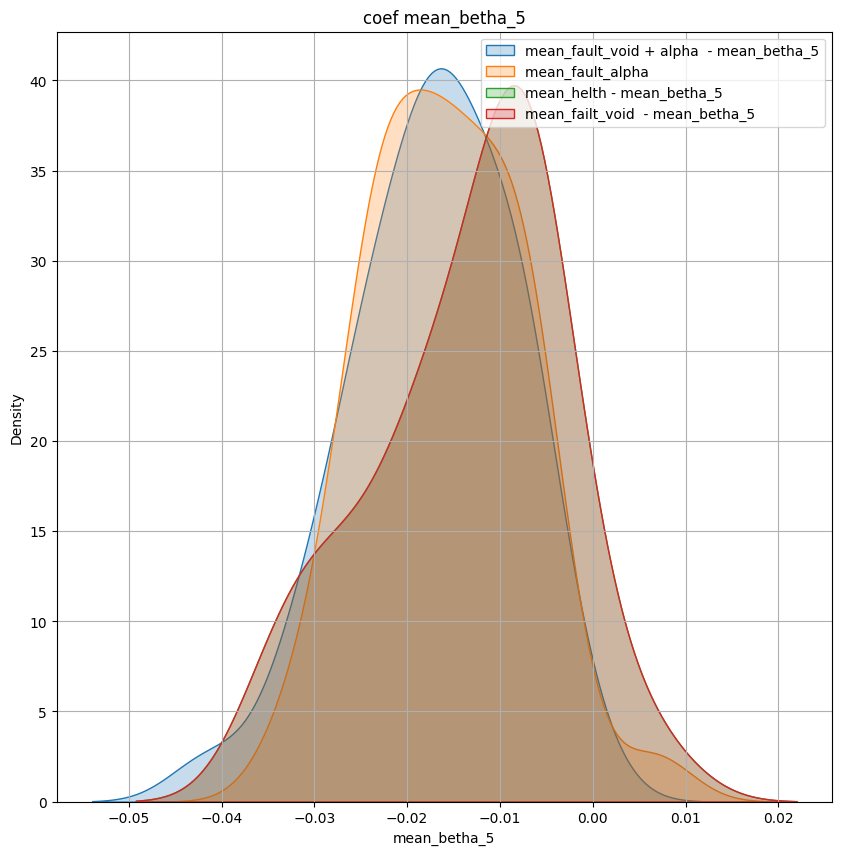

In [32]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [33]:
df_result = pd.DataFrame(total_simulation)


In [46]:
df_result.head(5)

bias_correlation  betha_0_correlation  betha_1_correlation  \
0          0.011513                  NaN            -0.009577   
1          0.002924                  NaN             0.026182   
2          0.014539                  NaN            -0.067399   
3         -0.000464                  NaN             0.075069   
4          0.012238                  NaN            -0.031387   

   betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0            -0.007296             0.023831            -0.000578   
1            -0.049241            -0.012470             0.040886   
2             0.029430             0.056960            -0.094291   
3            -0.099299            -0.055727             0.078650   
4             0.026335             0.024720            -0.077854   

   betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0            -0.005107  0.000     1        0.3750  ...              500   
1            -0.045969  0.000     2        0.4125  ...              500   
2            -0.018862  0.000     3        0.4500  ...              500   
3            -0.097456  0.000     4        0.4625  ...              200   
4            -0.048409  0.001     1        0.4125  ...              200   

   max_features_RF max_depth_RF  criterion_RF accuracy_extra_classifier  \
0             sqrt            6          gini                    0.3875   
1             sqrt            4          gini                    0.5125   
2             sqrt            7       entropy                    0.4625   
3             sqrt            4          gini                    0.4875   
4             sqrt            4          gini                    0.3750   

   accuracy_svc_  C_svc  kernel_svc gamma_svc     ann  
0         0.5250   1000         rbf       0.1  0.4000  
1         0.4750     10         rbf       0.1  0.4875  
2         0.4875    100         rbf       0.1  0.3875  
3         0.4750    100         rbf       0.1  0.5125  
4         0.5000   1000         rbf       0.1  0.4250  

[5 rows x 21 columns]

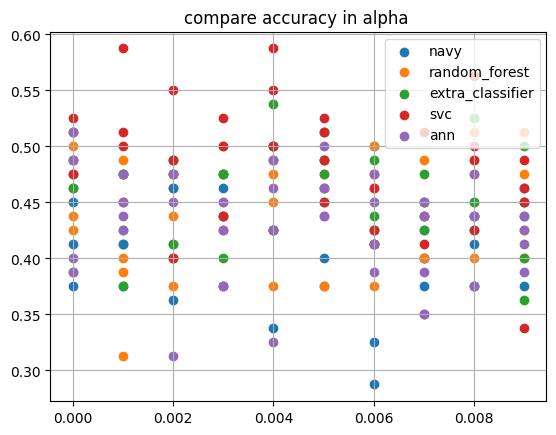

In [36]:
plt.scatter( df_result['alpha'] , df_result['accuracy_nav'] , label = 'navy')
plt.scatter( df_result['alpha'] , df_result['accuracy_random_forest'] , label = 'random_forest')
plt.scatter( df_result['alpha'] , df_result['accuracy_extra_classifier'] , label = 'extra_classifier')
plt.scatter( df_result['alpha'] , df_result['accuracy_svc_'] , label = 'svc')
plt.scatter( df_result['alpha'] , df_result['ann'] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.legend()
plt.grid()
plt.show()

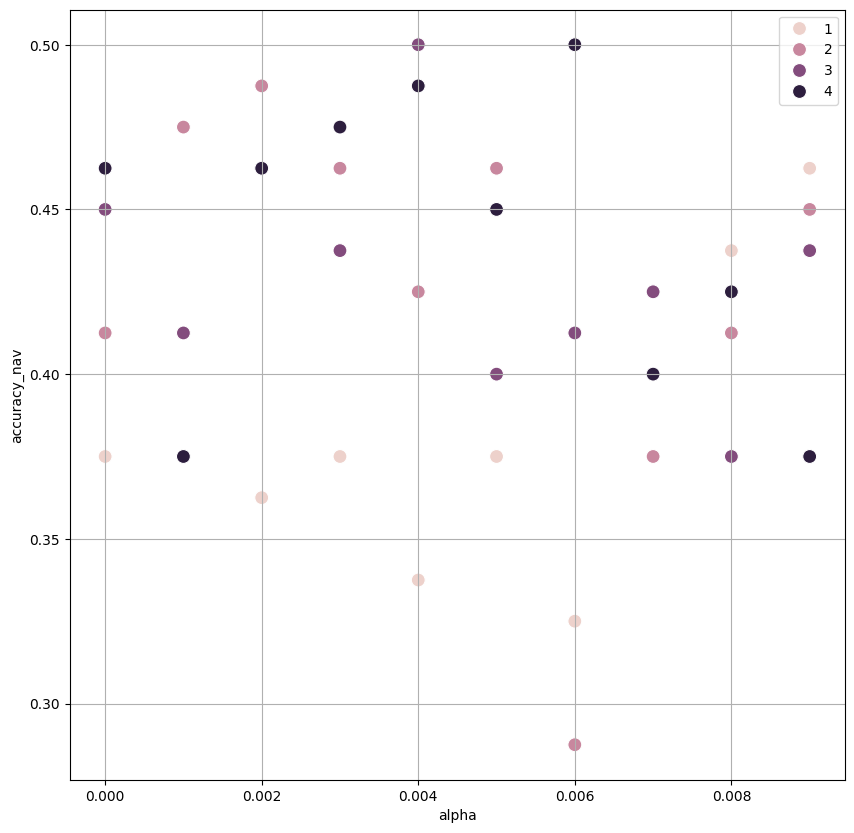

In [40]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

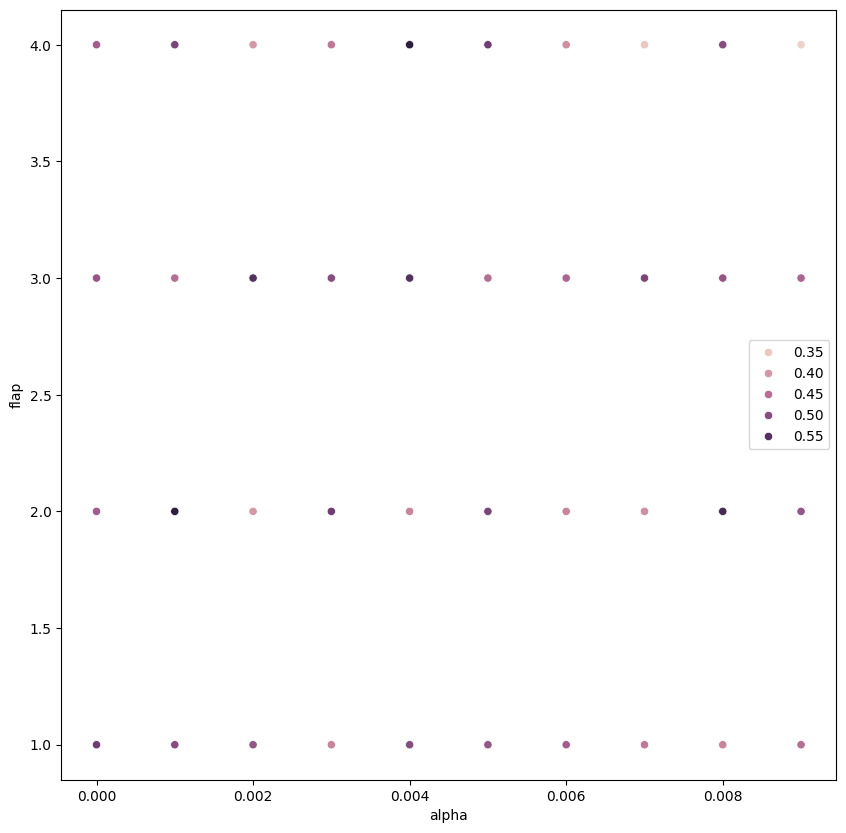

In [42]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [50]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

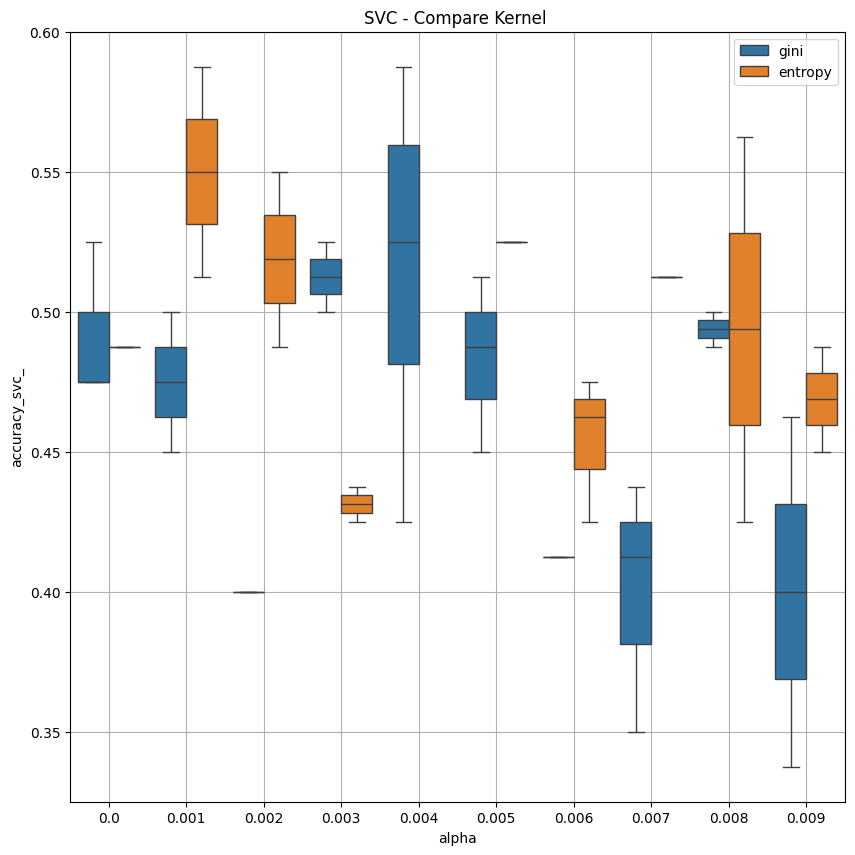

In [55]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='kernel_svc', data = df_result )
plt.legend()
plt.grid()
plt.show()
